### Pickup Mark Prediction

In [296]:
import numpy as np 

In [297]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [298]:
import sklearn

In [299]:
defects=pd.read_csv(r'C:/Users/yogesh.agre/Documents/SG1 pick up mark/ML_model_P.csv')

In [300]:
defects

Pull  Z1_temp  Z2_temp  Z2_Bottom  Z3_temp  Z3_Bottom  Z4_Left temp  \
0    221.61   1346.0   1252.0     1278.0   1192.0     1226.0        1136.0   
1    219.55   1346.0   1252.0     1278.0   1191.0     1225.0        1135.0   
2    219.22   1346.0   1253.0     1278.0   1192.0     1226.0        1136.0   
3    218.88   1346.0   1253.0     1278.0   1193.0     1227.0        1138.0   
4    218.61   1346.0   1252.0     1277.0   1191.0     1224.0        1135.0   
..      ...      ...      ...        ...      ...        ...           ...   
349  203.18   1320.0   1230.0     1255.0   1182.0     1215.0        1128.0   
350  204.87   1320.0   1230.0     1256.0   1182.0     1215.0        1127.0   
351  203.73   1320.0   1230.0     1254.0   1181.0     1214.0        1126.0   
352  202.63   1320.0   1229.0     1254.0   1181.0     1214.0        1126.0   
353  202.90   1320.0   1230.0     1235.0   1182.0     1215.0        1127.0   

     Z4_Centre temp  Z4_Right temp  sheet_thickness  Actual_thick_Min. LHS  \
0            1134.0         1143.0              3.2                   3.13   
1            1134.0         1142.0              3.2                   3.16   
2            1134.0         1143.0              3.2                   3.26   
3            1136.0         1145.0              3.2                   3.13   
4            1133.0         1141.0              3.2                   3.11   
..              ...            ...              ...                    ...   
349          1126.0         1135.0              3.2                   3.30   
350          1126.0         1135.0              3.2                   3.26   
351          1125.0         1134.0              3.2                   3.25   
352          1124.0         1133.0              3.2                   3.26   
353          1126.0         1135.0              3.2                   3.31   

     Actual_thick_Max. LHS  Actual_thick_Min.  Center  \
0                     3.26                       3.02   
1                     3.28                       3.04   
2                     3.34                       3.03   
3                     3.17                       3.02   
4                     3.16                       3.05   
..                     ...                        ...   
349                   3.36                       3.06   
350                   3.31                       3.05   
351                   3.31                       3.05   
352                   3.31                       3.04   
353                   3.38                       3.04   

     Actual_thick_Max. Center  Actual_thick_Min. RHS  Actual_thick_Max. RHS  \
0                        3.25                   3.25                   3.32   
1                        3.21                   3.15                   3.33   
2                        3.15                   3.26                   3.30   
3                        3.21                   3.12                   3.15   
4                        3.14                   3.17                   3.20   
..                        ...                    ...                    ...   
349                      3.16                   3.35                   3.44   
350                      3.13                   3.32                   3.36   
351                      3.12                   3.32                   3.38   
352                      3.10                   3.29                   3.34   
353                      3.10                   3.30                   3.33   

     Roller_speed_Top  Roller_speed_Bottom  Roller_speed_Carriage  \
0               657.0                657.0                  679.0   
1               657.0                657.0                  679.0   
2               657.0                657.0                  679.0   
3               657.0                657.0                  679.0   
4               657.0                657.0                  679.0   
..                ...                  ...                    ...   
349             

In [301]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

from sklearn.preprocessing import StandardScaler

In [302]:
defects.shape

(354, 22)

In [303]:
defects.dtypes

Pull                         float64
Z1_temp                      float64
Z2_temp                      float64
Z2_Bottom                    float64
Z3_temp                      float64
Z3_Bottom                    float64
Z4_Left temp                 float64
Z4_Centre temp               float64
Z4_Right temp                float64
sheet_thickness              float64
Actual_thick_Min. LHS        float64
Actual_thick_Max. LHS        float64
Actual_thick_Min.  Center    float64
Actual_thick_Max. Center     float64
Actual_thick_Min. RHS        float64
Actual_thick_Max. RHS        float64
Roller_speed_Top             float64
Roller_speed_Bottom          float64
Roller_speed_Carriage        float64
Roller_speed_Table           float64
LEHR_SPEED                   float64
Pick_up_mark                 float64
dtype: object

In [304]:
defects[29:95]

Pull  Z1_temp  Z2_temp  Z2_Bottom  Z3_temp  Z3_Bottom  Z4_Left temp  \
29  219.72   1346.0   1252.0     1273.0   1191.0     1225.0        1136.0   
30  219.62   1346.0   1252.0     1272.0   1191.0     1224.0        1134.0   
31  221.70   1346.0   1253.0     1274.0   1191.0     1225.0        1134.0   
32  221.79   1346.0   1252.0     1271.0   1190.0     1224.0        1134.0   
33  221.88   1346.0   1251.0     1271.0   1188.0     1223.0        1132.0   
..     ...      ...      ...        ...      ...        ...           ...   
90  221.93   1346.0   1252.0     1272.0   1190.0     1224.0        1133.0   
91  222.28   1346.0   1251.0     1270.0   1190.0     1224.0        1133.0   
92  221.35   1346.0   1252.0     1271.0   1191.0     1224.0        1134.0   
93  220.08   1346.0   1252.0     1272.0   1191.0     1226.0        1139.0   
94  221.80   1346.0   1253.0     1272.0   1193.0     1226.0        1139.0   

    Z4_Centre temp  Z4_Right temp  sheet_thickness  Actual_thick_Min. LHS  \
29          1134.0         1143.0              3.2                   3.16   
30          1133.0         1142.0              3.2                   3.11   
31          1133.0         1142.0              3.2                   3.26   
32          1133.0         1141.0              3.2                   3.13   
33          1131.0         1140.0              3.2                   3.11   
..             ...            ...              ...                    ...   
90          1132.0         1140.0              3.2                   3.20   
91          1132.0         1140.0              3.2                   3.23   
92          1133.0         1141.0              3.2                   3.22   
93          1136.0         1146.0              3.2                   3.21   
94          1137.0         1146.0              3.2                   3.16   

    Actual_thick_Max. LHS  Actual_thick_Min.  Center  \
29                   3.28                       3.04   
30                   3.24                       3.05   
31                   3.34                       3.03   
32                   3.17                       3.02   
33                   3.16                       3.05   
..                    ...                        ...   
90                   3.29                       3.08   
91                   3.32                       3.08   
92                   3.33                       3.09   
93                   3.32                       3.08   
94                   3.26                       3.05   

    Actual_thick_Max. Center  Actual_thick_Min. RHS  Actual_thick_Max. RHS  \
29                      3.21                   3.15                   3.33   
30                      3.26                   3.21                   3.29   
31                      3.15                   3.26                   3.30   
32                      3.21                   3.12                   3.15   
33                      3.14                   3.17                   3.20   
..                       ...                    ...                    ...   
90                      3.16                   3.18                   3.23   
91                      3.19                   3.20                   3.24   
92                      3.17                   3.21                   3.26   
93                      3.17                   3.20                   3.27   
94                      3.15                   3.17                   3.23   

    Roller_speed_Top  Roller_speed_Bottom  Roller_speed_Carriage  \
29             659.0                659.0                  685.0   
30             659.0                659.0                  685.0   
31             658.0                658.0                  685.0   
32             655.0                655.0                  685.0   
33             655.0                655.0                  685.0   
..               ...                  ...                    ...   
90             646.0                646.0                  674.0   
91

In [305]:
defects.describe()

Pull      Z1_temp      Z2_temp    Z2_Bottom      Z3_temp  \
count  354.000000   354.000000   354.000000   354.000000   354.000000   
mean   211.113757  1337.350282  1244.768362  1266.392655  1190.350282   
std      8.563639     8.213608     8.228845     7.862923    13.324302   
min    188.630000  1320.000000  1226.000000  1226.000000  1128.000000   
25%    203.362500  1330.000000  1237.000000  1260.000000  1181.000000   
50%    212.825000  1337.000000  1249.000000  1269.000000  1190.000000   
75%    219.052500  1346.000000  1252.000000  1272.000000  1192.000000   
max    223.720000  1350.000000  1261.000000  1280.000000  1228.000000   

         Z3_Bottom  Z4_Left temp  Z4_Centre temp  Z4_Right temp  \
count   354.000000    354.000000      354.000000     354.000000   
mean   1223.395480   1136.867232     1134.494350    1142.372881   
std      10.810056     16.147054       14.113511      21.484086   
min    1203.000000   1111.000000     1109.000000    1030.000000   
25%    1215.000000   1127.000000     1125.250000    1131.000000   
50%    1224.000000   1135.000000     1133.000000    1141.000000   
75%    1226.000000   1138.000000     1136.000000    1145.000000   
max    1252.000000   1182.000000     1175.000000    1442.000000   

       sheet_thickness  Actual_thick_Min. LHS  Actual_thick_Max. LHS  \
count       354.000000             354.000000             354.000000   
mean          3.031638               3.039379               3.109915   
std           0.405227               0.379815               0.385070   
min           2.000000               2.020000               2.070000   
25%           3.200000               3.120000               3.200000   
50%           3.200000               3.190000               3.260000   
75%           3.200000               3.237500               3.300000   
max           3.200000               3.360000               3.410000   

       Actual_thick_Min.  Center  Actual_thick_Max. Center  \
count                 353.000000                353.000000   
mean                    2.889207                  3.013456   
std                     0.385836                  0.403934   
min                     1.800000                  1.860000   
25%                     3.010000                  3.140000   
50%                     3.040000                  3.160000   
75%                     3.060000                  3.200000   
max                     3.230000                  3.310000   

       Actual_thick_Min. RHS  Actual_thick_Max. RHS  Roller_speed_Top  \
count             354.000000             354.000000        354.000000   
mean                3.035056               3.100254        628.214689   
std                 0.383175               0.389218         45.771810   
min                 2.010000               2.070000        545.000000   
25%                 3.100000               3.170000        593.000000   
50%                 3.180000               3.260000        624.500000   
75%                 3.240000               3.300000        646.000000   
max                 3.350000               3.440000        739.000000   

       Roller_speed_Bottom  Roller_speed_Carriage  Roller_speed_Table  \
count           354.000000             354.000000          354.000000   
mean            629.132768             693.370056          750.940678   
std              44.620234             103.085384          117.675187   
min             557.000000             597.000000          634.000000   
25%             595.000000             637.000000          686.000000   
50%             624.500000             664.000000          713.000000   
75%             646.000000             679.000000          737.000000   
max             739.000000            1010.000000         1087.000000   

        LEHR_SPEED  Pick_up_mark  
count   354.000000    353.000000  
mean    787.774011      6.742975  
std     128.195251      4.932499  
min     685.000000      0.290000  
25%     725.250000      2.680000  
50%     745.00000

In [306]:
defects.isnull().sum()

Pull                         0
Z1_temp                      0
Z2_temp                      0
Z2_Bottom                    0
Z3_temp                      0
Z3_Bottom                    0
Z4_Left temp                 0
Z4_Centre temp               0
Z4_Right temp                0
sheet_thickness              0
Actual_thick_Min. LHS        0
Actual_thick_Max. LHS        0
Actual_thick_Min.  Center    1
Actual_thick_Max. Center     1
Actual_thick_Min. RHS        0
Actual_thick_Max. RHS        0
Roller_speed_Top             0
Roller_speed_Bottom          0
Roller_speed_Carriage        0
Roller_speed_Table           0
LEHR_SPEED                   0
Pick_up_mark                 1
dtype: int64

In [307]:
defects

Pull  Z1_temp  Z2_temp  Z2_Bottom  Z3_temp  Z3_Bottom  Z4_Left temp  \
0    221.61   1346.0   1252.0     1278.0   1192.0     1226.0        1136.0   
1    219.55   1346.0   1252.0     1278.0   1191.0     1225.0        1135.0   
2    219.22   1346.0   1253.0     1278.0   1192.0     1226.0        1136.0   
3    218.88   1346.0   1253.0     1278.0   1193.0     1227.0        1138.0   
4    218.61   1346.0   1252.0     1277.0   1191.0     1224.0        1135.0   
..      ...      ...      ...        ...      ...        ...           ...   
349  203.18   1320.0   1230.0     1255.0   1182.0     1215.0        1128.0   
350  204.87   1320.0   1230.0     1256.0   1182.0     1215.0        1127.0   
351  203.73   1320.0   1230.0     1254.0   1181.0     1214.0        1126.0   
352  202.63   1320.0   1229.0     1254.0   1181.0     1214.0        1126.0   
353  202.90   1320.0   1230.0     1235.0   1182.0     1215.0        1127.0   

     Z4_Centre temp  Z4_Right temp  sheet_thickness  Actual_thick_Min. LHS  \
0            1134.0         1143.0              3.2                   3.13   
1            1134.0         1142.0              3.2                   3.16   
2            1134.0         1143.0              3.2                   3.26   
3            1136.0         1145.0              3.2                   3.13   
4            1133.0         1141.0              3.2                   3.11   
..              ...            ...              ...                    ...   
349          1126.0         1135.0              3.2                   3.30   
350          1126.0         1135.0              3.2                   3.26   
351          1125.0         1134.0              3.2                   3.25   
352          1124.0         1133.0              3.2                   3.26   
353          1126.0         1135.0              3.2                   3.31   

     Actual_thick_Max. LHS  Actual_thick_Min.  Center  \
0                     3.26                       3.02   
1                     3.28                       3.04   
2                     3.34                       3.03   
3                     3.17                       3.02   
4                     3.16                       3.05   
..                     ...                        ...   
349                   3.36                       3.06   
350                   3.31                       3.05   
351                   3.31                       3.05   
352                   3.31                       3.04   
353                   3.38                       3.04   

     Actual_thick_Max. Center  Actual_thick_Min. RHS  Actual_thick_Max. RHS  \
0                        3.25                   3.25                   3.32   
1                        3.21                   3.15                   3.33   
2                        3.15                   3.26                   3.30   
3                        3.21                   3.12                   3.15   
4                        3.14                   3.17                   3.20   
..                        ...                    ...                    ...   
349                      3.16                   3.35                   3.44   
350                      3.13                   3.32                   3.36   
351                      3.12                   3.32                   3.38   
352                      3.10                   3.29                   3.34   
353                      3.10                   3.30                   3.33   

     Roller_speed_Top  Roller_speed_Bottom  Roller_speed_Carriage  \
0               657.0                657.0                  679.0   
1               657.0                657.0                  679.0   
2               657.0                657.0                  679.0   
3               657.0                657.0                  679.0   
4               657.0                657.0                  679.0   
..                ...                  ...                    ...   
349             

In [308]:
defects['Actual_thick_Min.  Center'] = defects['Actual_thick_Min.  Center'].fillna(defects['Actual_thick_Min.  Center'].mean())

In [309]:
defects['Actual_thick_Max. Center'] = defects['Actual_thick_Max. Center'].fillna(defects['Actual_thick_Max. Center'].mean())

In [310]:
defects['Pick_up_mark'] = defects['Pick_up_mark'].fillna(defects['Pick_up_mark'].mean())

In [311]:
defects.isnull().sum()

Pull                         0
Z1_temp                      0
Z2_temp                      0
Z2_Bottom                    0
Z3_temp                      0
Z3_Bottom                    0
Z4_Left temp                 0
Z4_Centre temp               0
Z4_Right temp                0
sheet_thickness              0
Actual_thick_Min. LHS        0
Actual_thick_Max. LHS        0
Actual_thick_Min.  Center    0
Actual_thick_Max. Center     0
Actual_thick_Min. RHS        0
Actual_thick_Max. RHS        0
Roller_speed_Top             0
Roller_speed_Bottom          0
Roller_speed_Carriage        0
Roller_speed_Table           0
LEHR_SPEED                   0
Pick_up_mark                 0
dtype: int64

<Axes: >

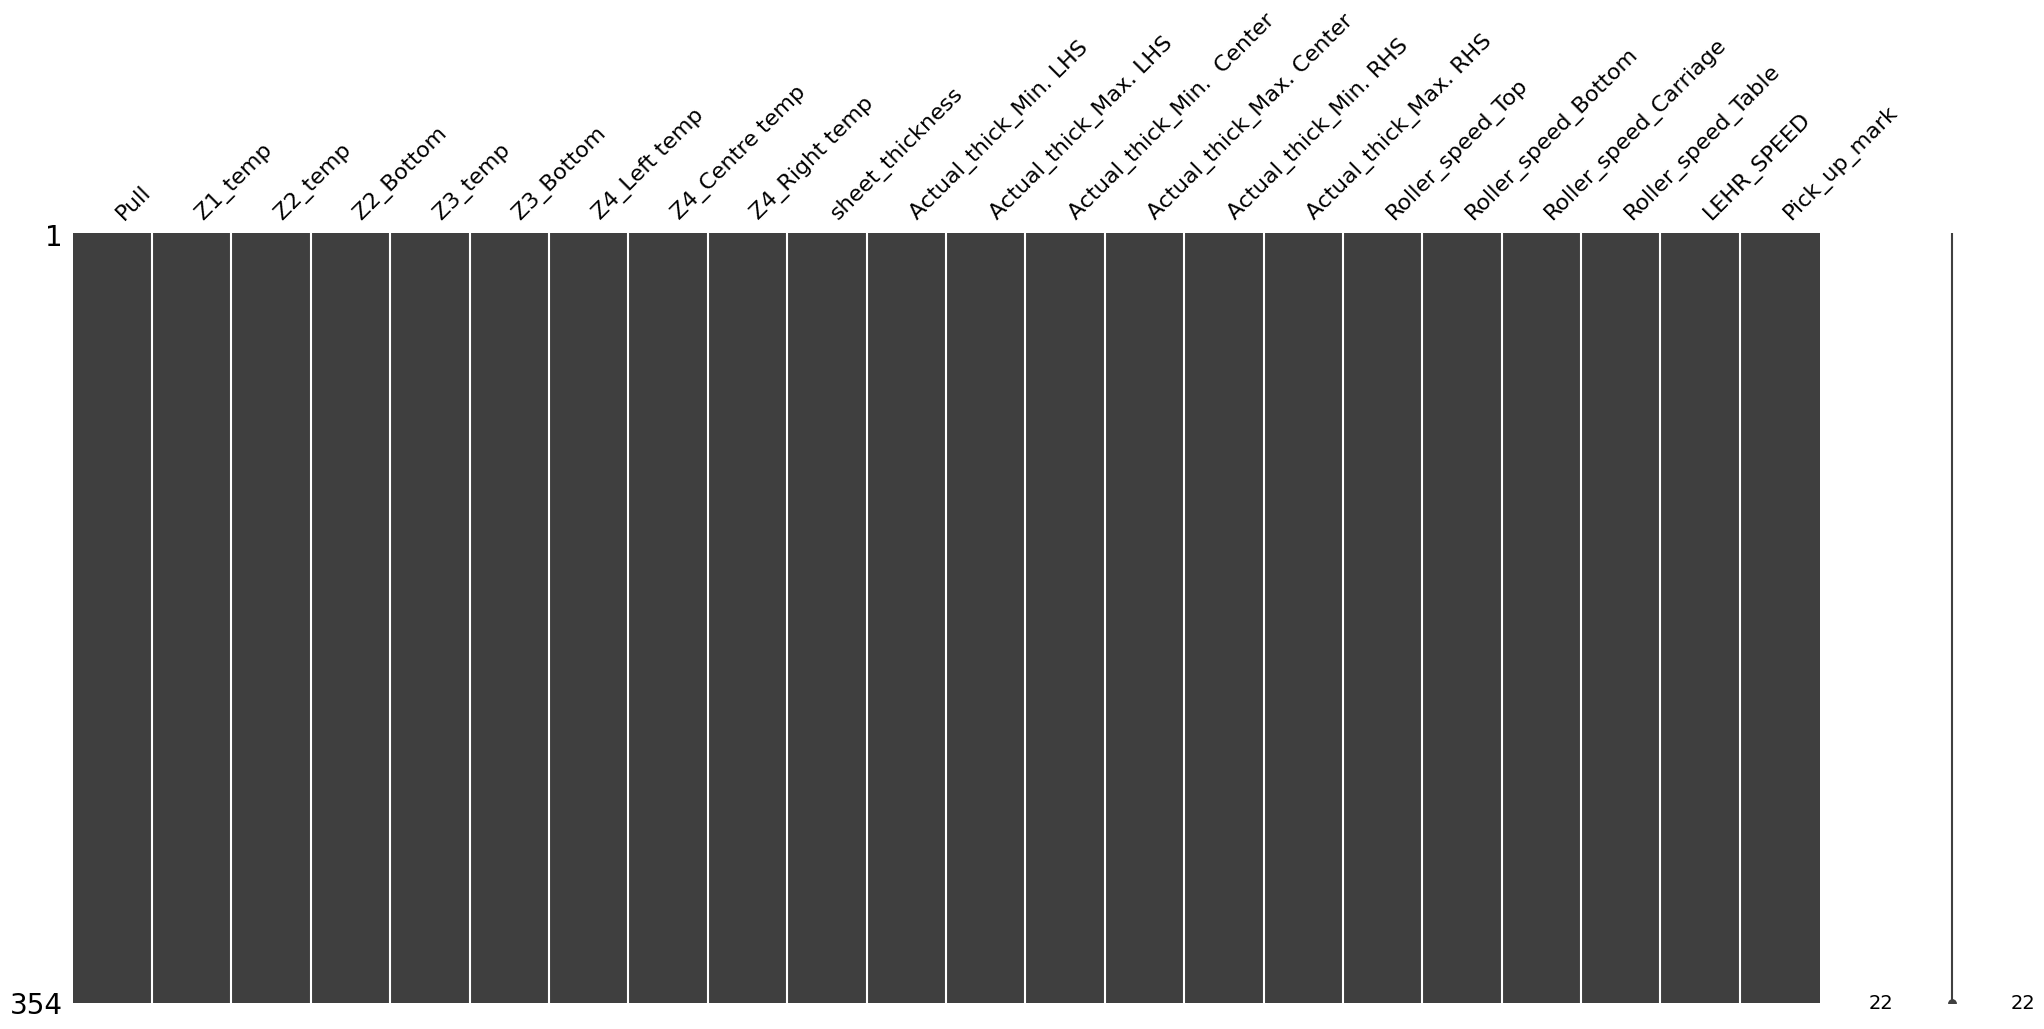

In [312]:
#visualizing the missing values
import missingno as msno
msno.matrix(defects)

In [313]:
#dataset duplicate count
duplicate_count = len(defects[defects.duplicated()])
print(f'total number of duplicate count is',duplicate_count)

total number of duplicate count is 0


In [314]:
#Checking unique values of each variable

defects.nunique()

Pull                         323
Z1_temp                       29
Z2_temp                       35
Z2_Bottom                     34
Z3_temp                       49
Z3_Bottom                     45
Z4_Left temp                  53
Z4_Centre temp                48
Z4_Right temp                 55
sheet_thickness                3
Actual_thick_Min. LHS         53
Actual_thick_Max. LHS         51
Actual_thick_Min.  Center     50
Actual_thick_Max. Center      49
Actual_thick_Min. RHS         57
Actual_thick_Max. RHS         53
Roller_speed_Top              89
Roller_speed_Bottom           88
Roller_speed_Carriage         82
Roller_speed_Table            82
LEHR_SPEED                    79
Pick_up_mark                 304
dtype: int64

In [315]:
pd.set_option('display.max_colwidth',None)

In [316]:
#below we can check what are the unique values
defects.apply(lambda col:col.unique())

Pull                         [221.61, 219.55, 219.22, 218.88, 218.61, 223.68, 219.23, 218.96, 219.91, 220.74, 217.92, 220.5, 221.71, 221.38, 220.13, 218.78, 220.11, 221.36, 221.83, 219.53, 219.65, 218.83, 219.38, 221.05, 221.11, 219.0, 218.34, 218.98, 219.72, 219.62, 221.7, 221.79, 221.88, 220.6, 220.08, 218.09, 203.57, 208.38, 207.16, 203.89, 212.5, 212.28, 215.2, 212.84, 212.99, 215.59, 210.48, 215.77, 216.34, 216.79, 215.86, 216.69, 216.57, 217.73, 219.33, 217.61, 217.08, 218.08, 219.01, 217.21, 217.03, 219.03, 218.27, 218.26, 218.04, 216.67, 217.24, 217.12, 216.06, 218.06, 217.57, 217.68, 219.07, 218.87, 220.22, 219.6, 220.65, 220.8, 220.56, 219.71, 223.0, 223.26, 223.72, 222.07, 222.79, 220.87, 221.33, 221.57, 221.93, 222.28, 221.35, 221.8, 219.81, 200.09, 207.57, 207.52, 210.56, 209.47, 209.63, 212.37, ...]
Z1_temp                                                                                                                                                                        

### **Data Vizualization,Experimenting with charts : Understand the relationships between variables**

In [317]:
defects.columns

Index(['Pull', 'Z1_temp', 'Z2_temp', 'Z2_Bottom', 'Z3_temp', 'Z3_Bottom',
       'Z4_Left temp', 'Z4_Centre temp', 'Z4_Right temp', 'sheet_thickness',
       'Actual_thick_Min. LHS', 'Actual_thick_Max. LHS',
       'Actual_thick_Min.  Center', 'Actual_thick_Max. Center',
       'Actual_thick_Min. RHS', 'Actual_thick_Max. RHS', 'Roller_speed_Top',
       'Roller_speed_Bottom', 'Roller_speed_Carriage', 'Roller_speed_Table',
       'LEHR_SPEED', 'Pick_up_mark'],
      dtype='object')

In [318]:
parameters=['Pull', 'Z1_temp', 'Z2_temp', 'Z2_Bottom', 'Z3_temp', 'Z3_Bottom',
       'Z4_Left temp', 'Z4_Centre temp', 'Z4_Right temp', 'sheet_thickness',
       'Actual_thick_Min. LHS', 'Actual_thick_Max. LHS',
       'Actual_thick_Min.  Center', 'Actual_thick_Max. Center',
       'Actual_thick_Min. RHS', 'Actual_thick_Max. RHS', 'Roller_speed_Top',
       'Roller_speed_Bottom', 'Roller_speed_Carriage', 'Roller_speed_Table',
       'LEHR_SPEED', 'Pick_up_mark']

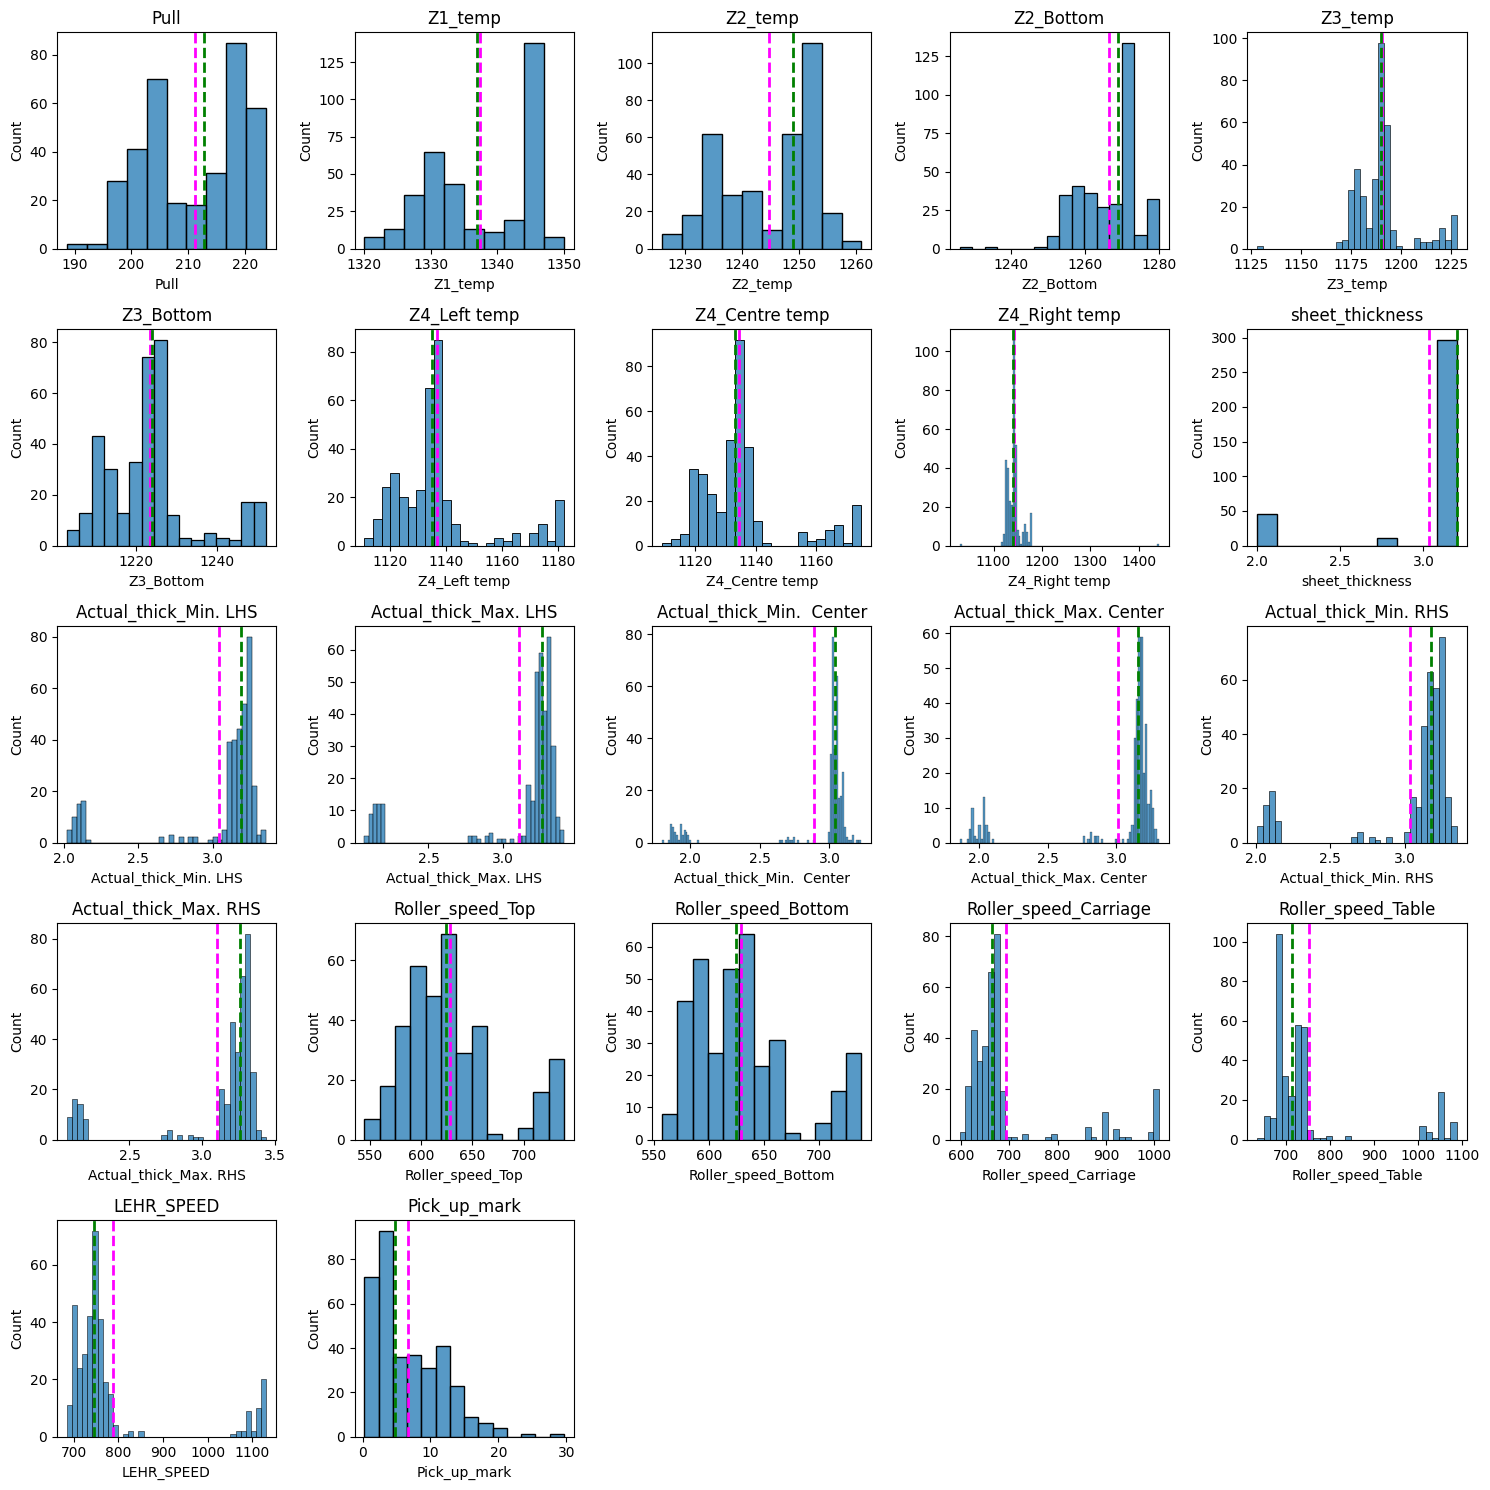

In [319]:
#Histogram
n=1
plt.figure(figsize=(15,15))
for col in parameters[:]:
  plt.subplot(5,5,n)
  n+=1
  sns.histplot(defects[col])
  plt.axvline(defects[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(defects[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col)
  plt.tight_layout()

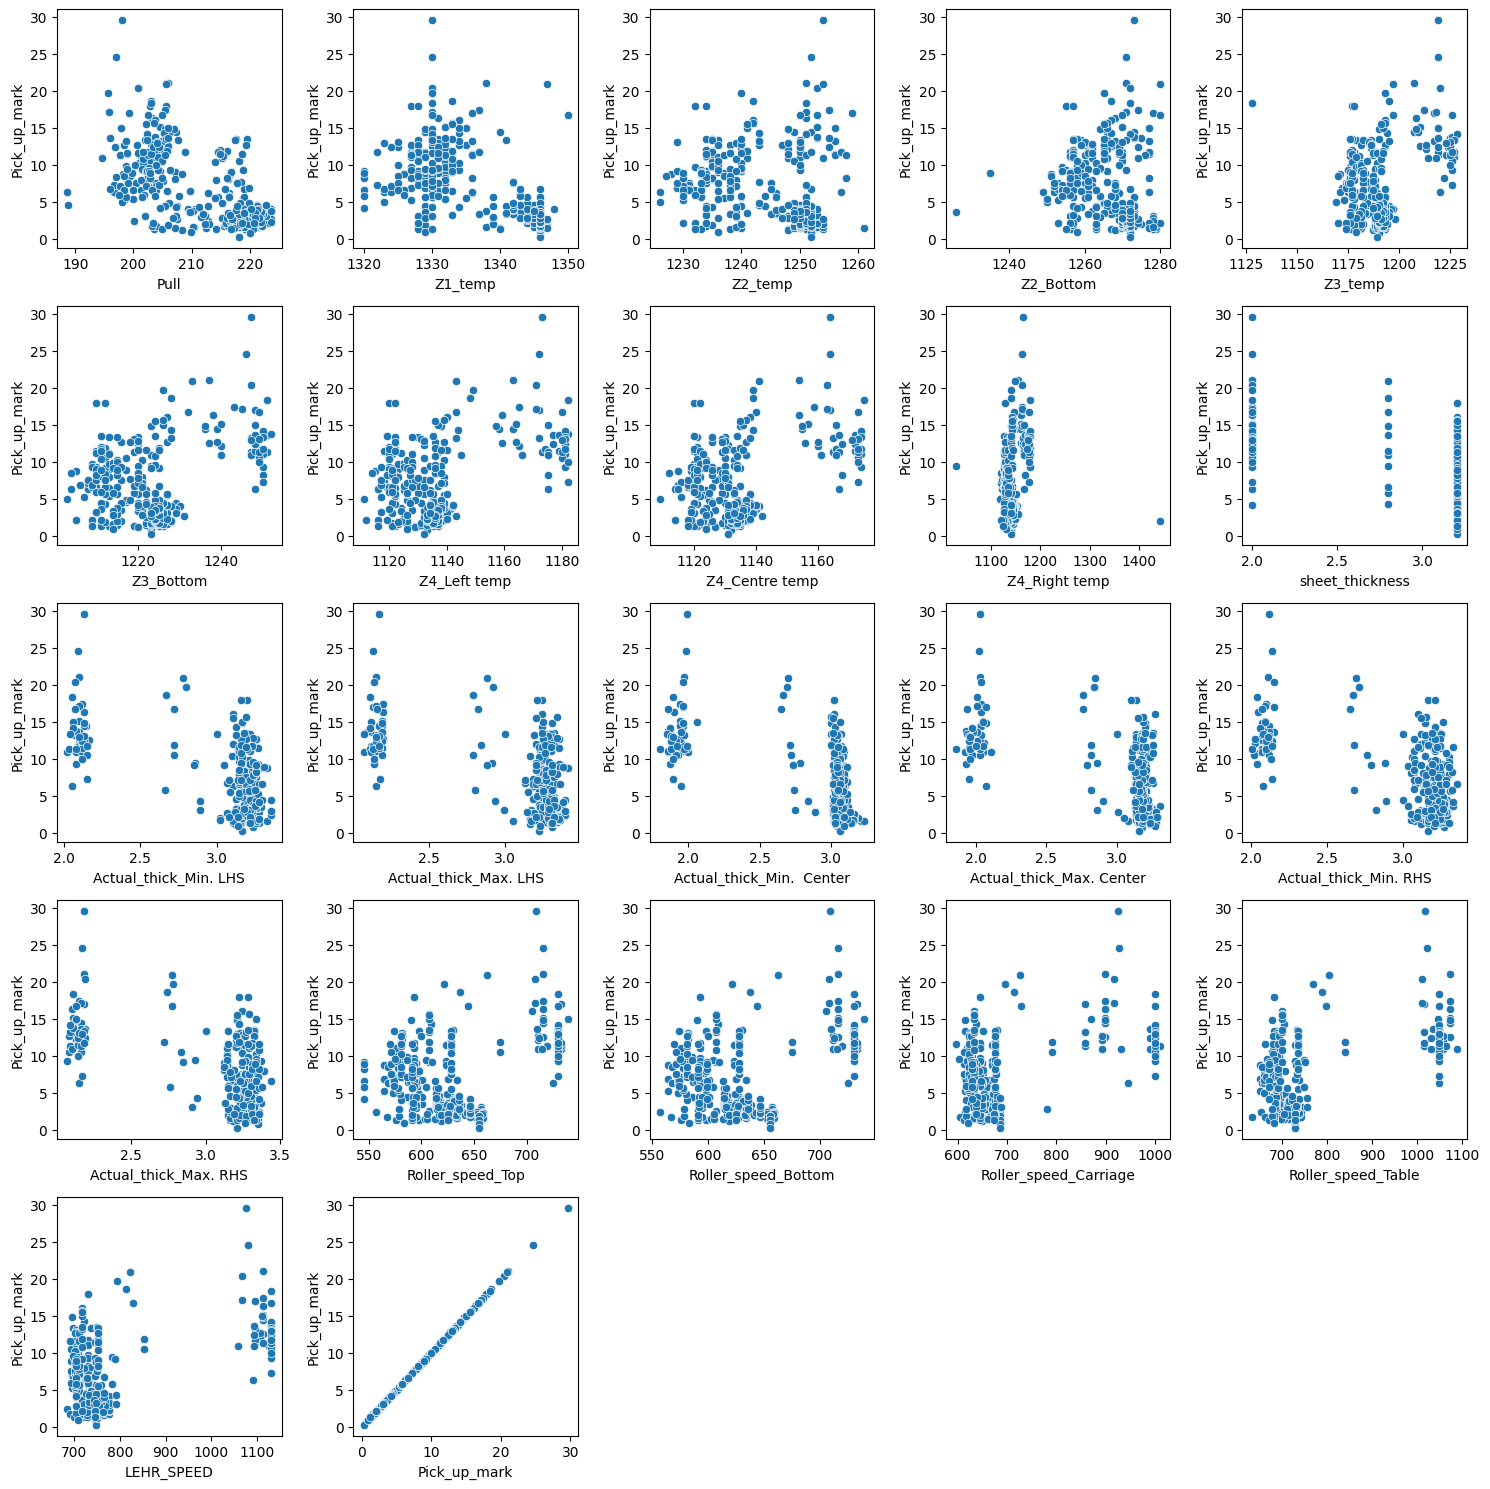

In [320]:
#scatter plot
n=1
plt.figure(figsize=(15,15))
for col in parameters:
  plt.subplot(5,5,n)
  n+=1
  sns.scatterplot(x=col,y='Pick_up_mark',data=defects)
  plt.tight_layout()

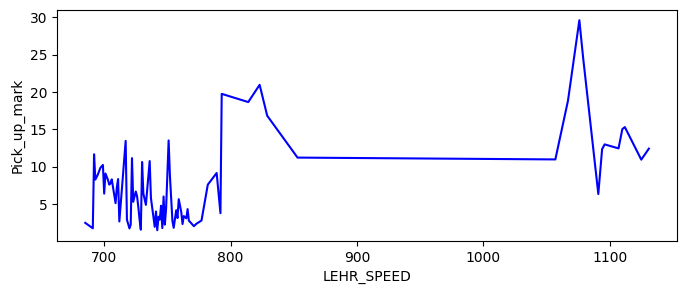

In [321]:
plt.figure(figsize = (8,3))
LEHR_SPEED_1 = defects.groupby('LEHR_SPEED').mean()['Pick_up_mark']
x0 = sns.lineplot(data = LEHR_SPEED_1,color ='b')

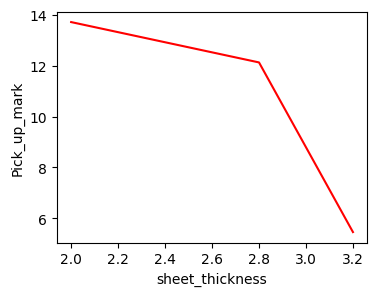

In [322]:
plt.figure(figsize = (4,3))
temp_df = defects.groupby('sheet_thickness').mean()['Pick_up_mark']
x0 = sns.lineplot(data = temp_df,color ='r')

In [323]:
# Check if dependant feature is normally distributed

from scipy.stats import normaltest

stat,p = normaltest(defects['Pick_up_mark'])

print('stat=%.2f, p=%.30f' % (stat, p))

if(p>0.05):
  print('Null Hypothesis accepted. Pick_up_marks are normally distributed')
else:
  print('Rejected Null Hypothesis. Pick_up_mark are not normally distributed')

stat=57.33, p=0.000000000000356043125587535627
Rejected Null Hypothesis. Pick_up_mark are not normally distributed


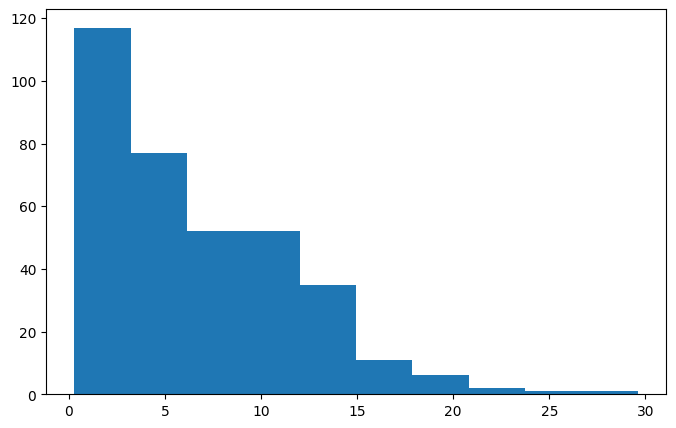

In [324]:
plt.figure(figsize=(8,5))
plt.hist(defects['Pick_up_mark'])
plt.show()

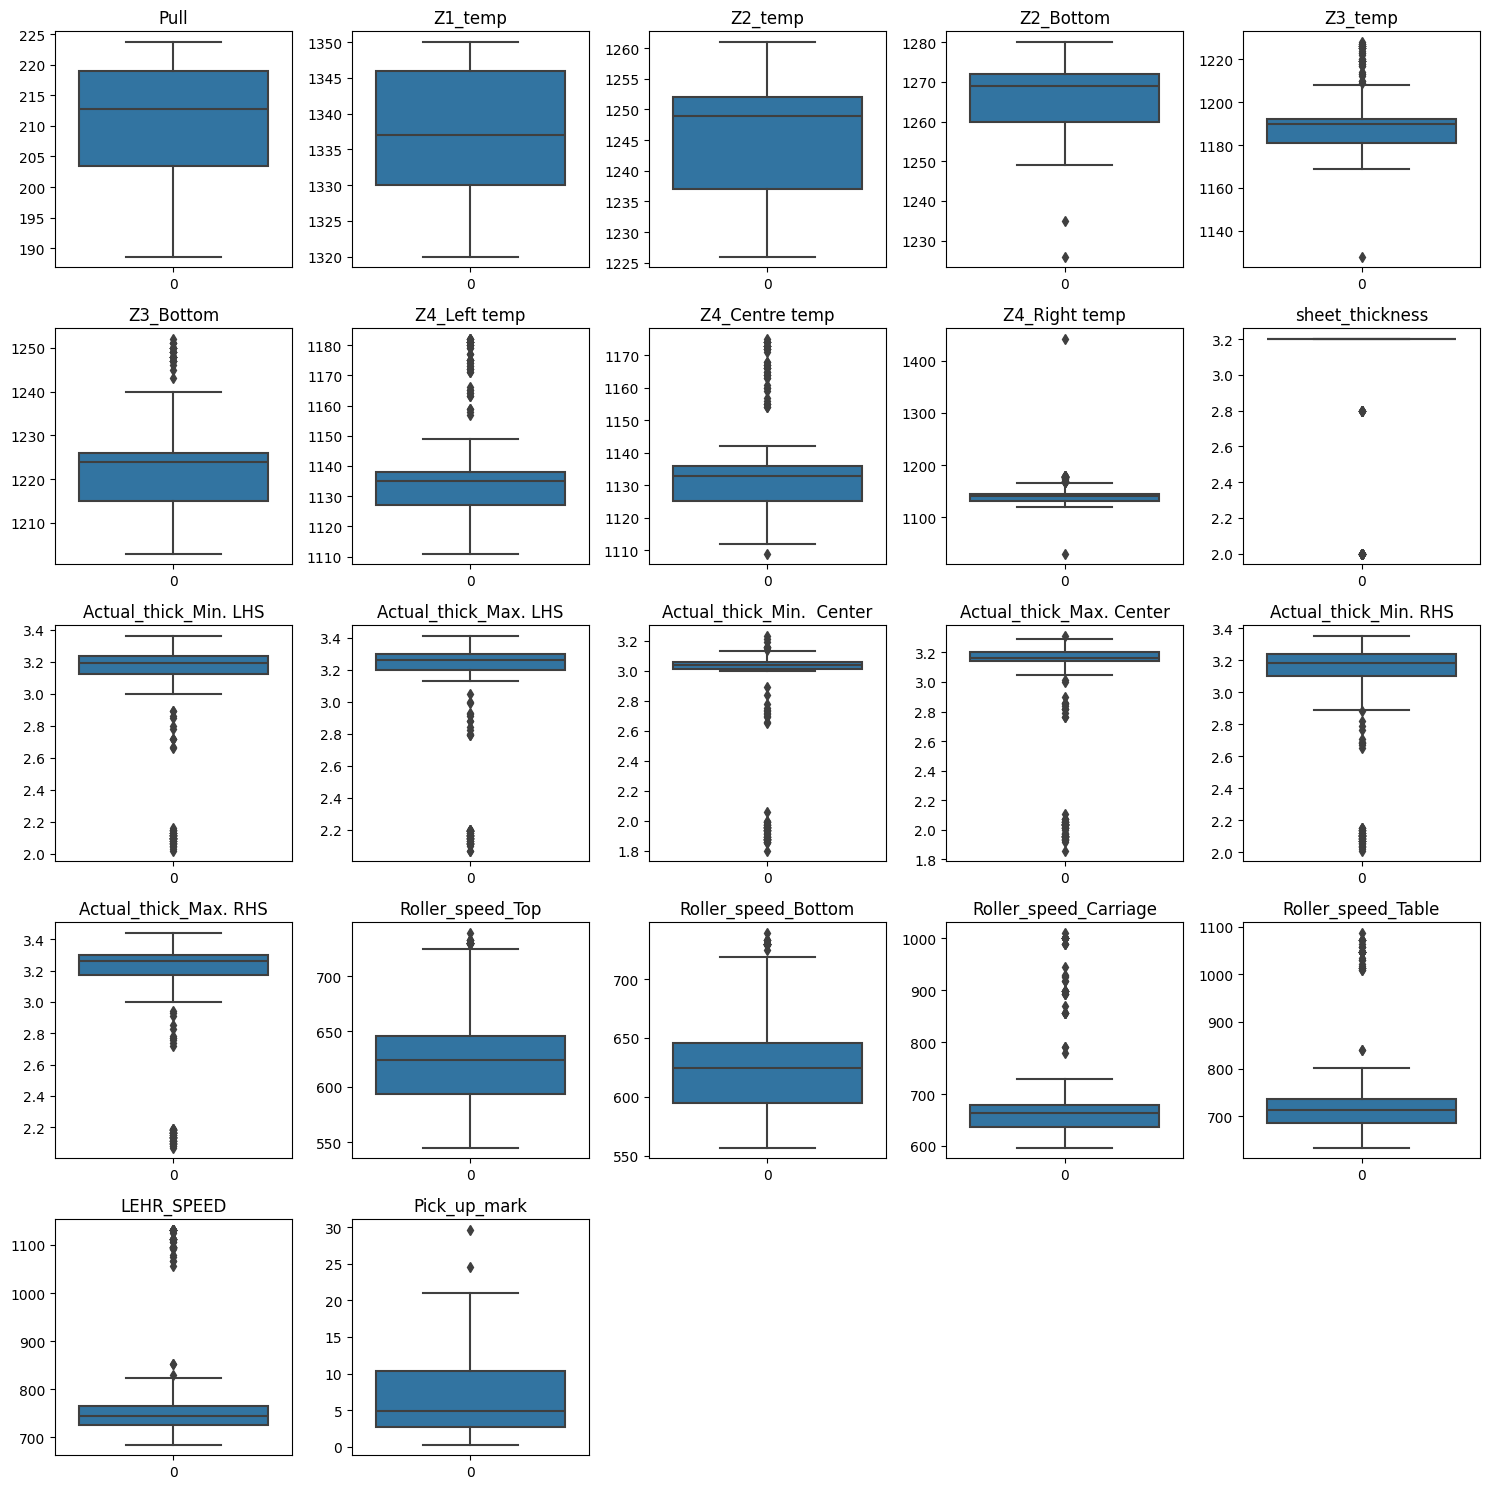

In [325]:
#Boxplot
#Checking for outliers
n=1
plt.figure(figsize=(15,15))
for col in parameters[:]:
  plt.subplot(5,5,n)
  n+=1
  sns.boxplot(defects[col])
  plt.title(col)
  plt.tight_layout()

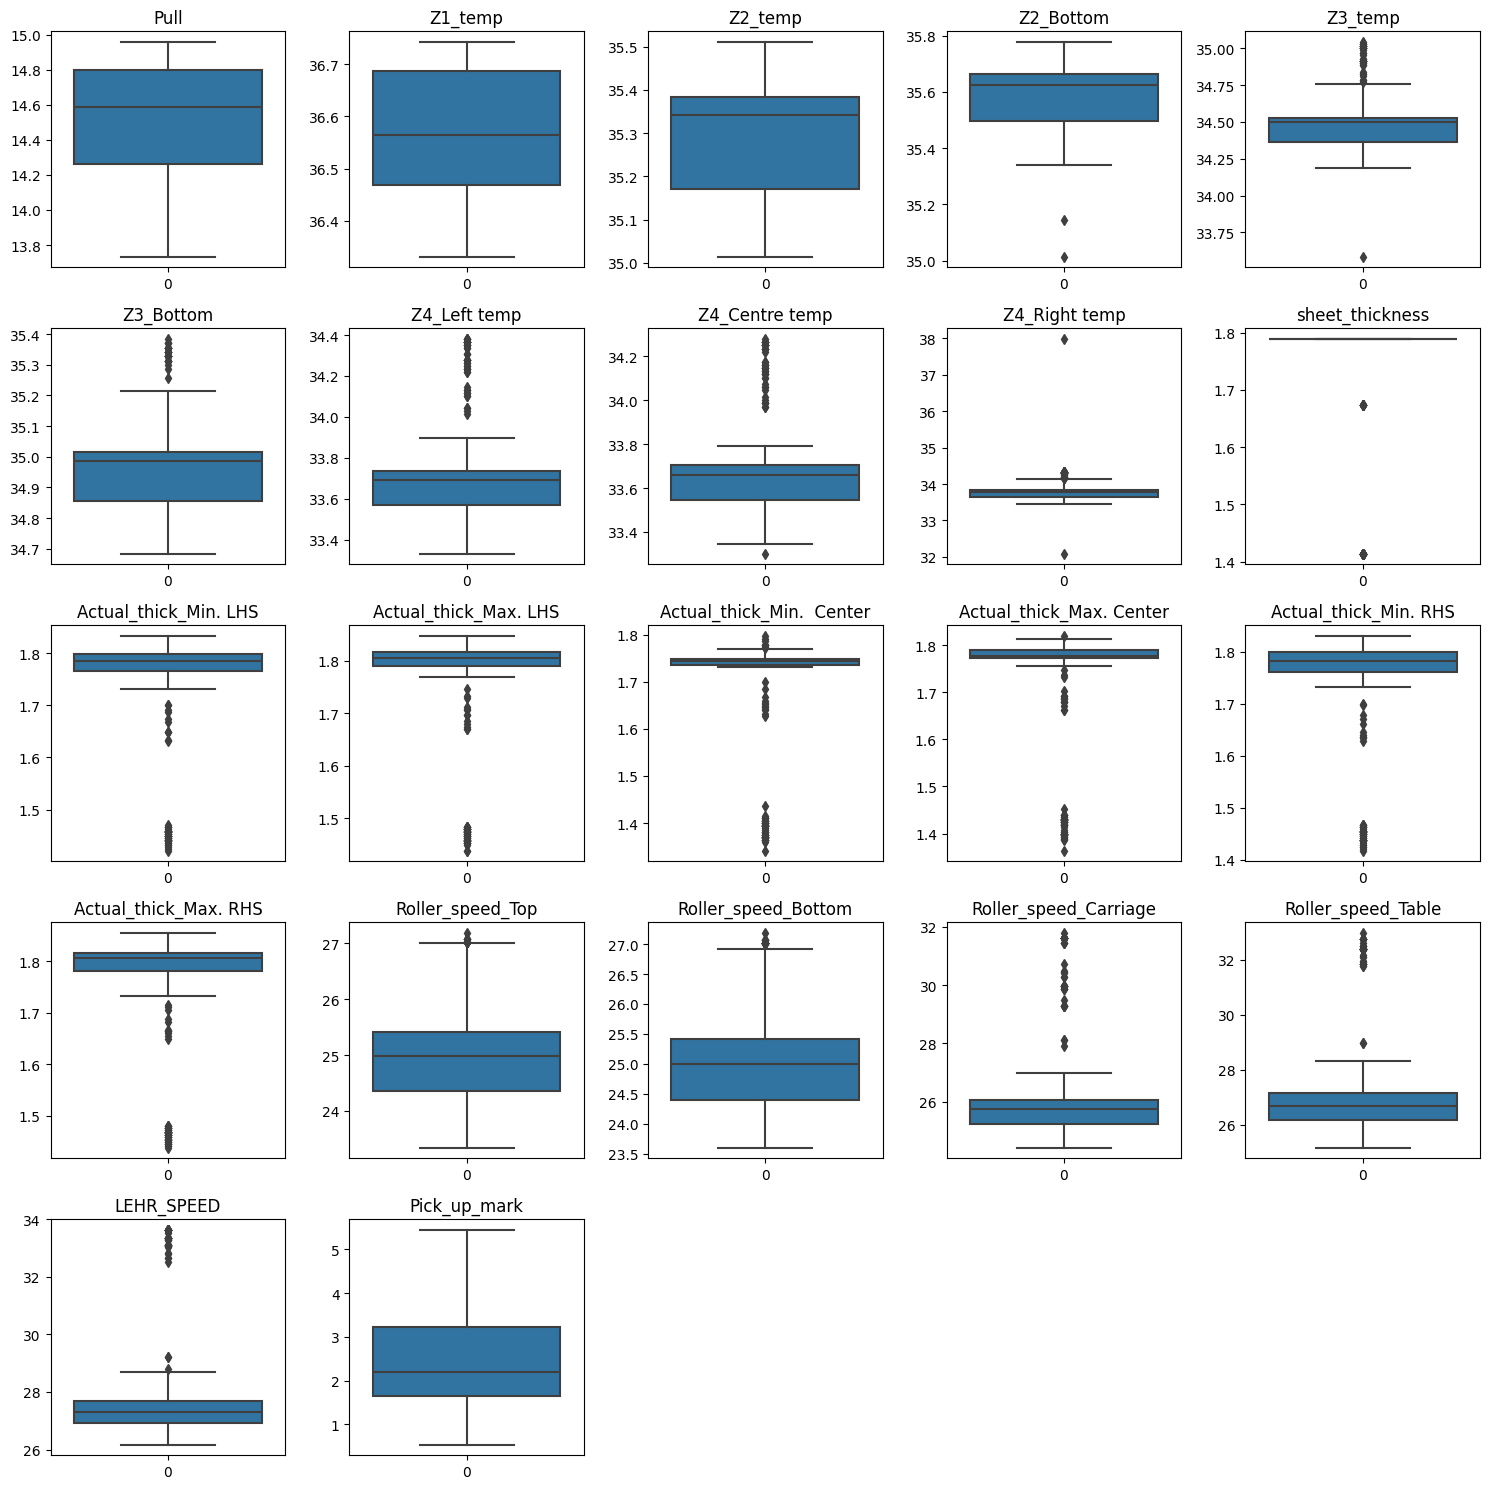

In [326]:
# Handling Outliers & Outlier treatments

n=1
plt.figure(figsize=(15,15))
for col in parameters[:]:
  plt.subplot(5,5,n)
  n+=1
  sns.boxplot(np.sqrt(defects[col]))
  plt.title(col)
  plt.tight_layout()

In [327]:
defects.dtypes

Pull                         float64
Z1_temp                      float64
Z2_temp                      float64
Z2_Bottom                    float64
Z3_temp                      float64
Z3_Bottom                    float64
Z4_Left temp                 float64
Z4_Centre temp               float64
Z4_Right temp                float64
sheet_thickness              float64
Actual_thick_Min. LHS        float64
Actual_thick_Max. LHS        float64
Actual_thick_Min.  Center    float64
Actual_thick_Max. Center     float64
Actual_thick_Min. RHS        float64
Actual_thick_Max. RHS        float64
Roller_speed_Top             float64
Roller_speed_Bottom          float64
Roller_speed_Carriage        float64
Roller_speed_Table           float64
LEHR_SPEED                   float64
Pick_up_mark                 float64
dtype: object

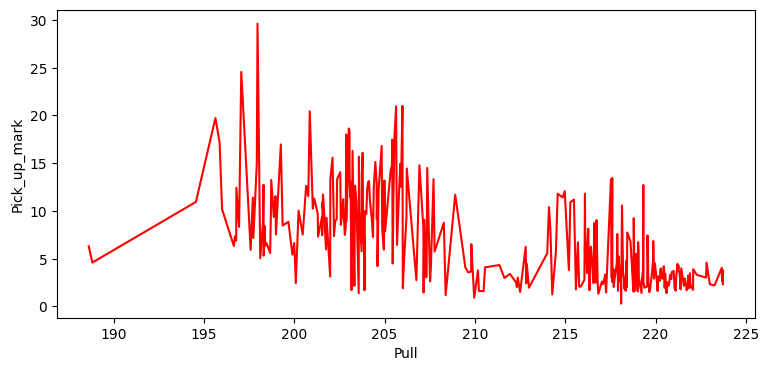

In [328]:
# Understanding relationship between rented bike count and humidity
plt.figure(figsize = (9,4))
temp_df = defects.groupby('Pull').mean()['Pick_up_mark']
x0 = sns.lineplot(data = temp_df,color ='r')

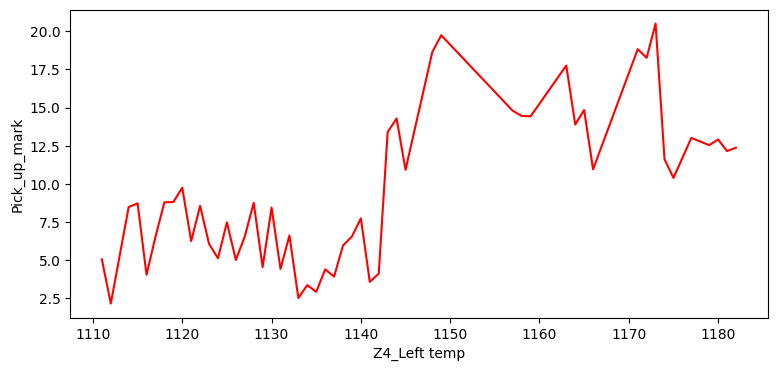

In [329]:
# Understanding relationship between rented bike count and humidity
plt.figure(figsize = (9,4))
temp_df = defects.groupby('Z4_Left temp').mean()['Pick_up_mark']
x0 = sns.lineplot(data = temp_df,color ='r')

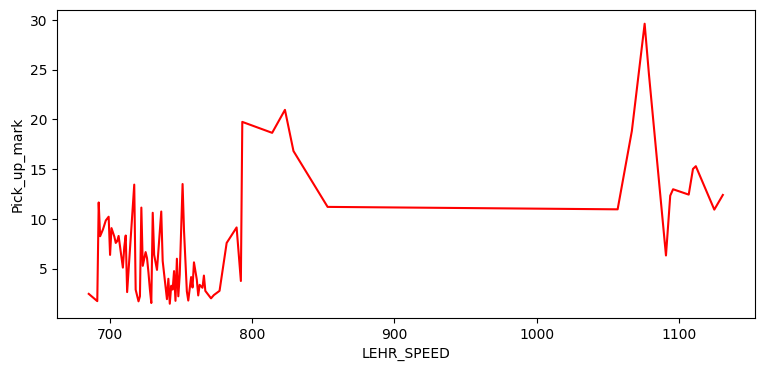

In [330]:
# Understanding relationship between rented bike count and humidity
plt.figure(figsize = (9,4))
temp_df = defects.groupby('LEHR_SPEED').mean()['Pick_up_mark']
x0 = sns.lineplot(data = temp_df,color ='r')

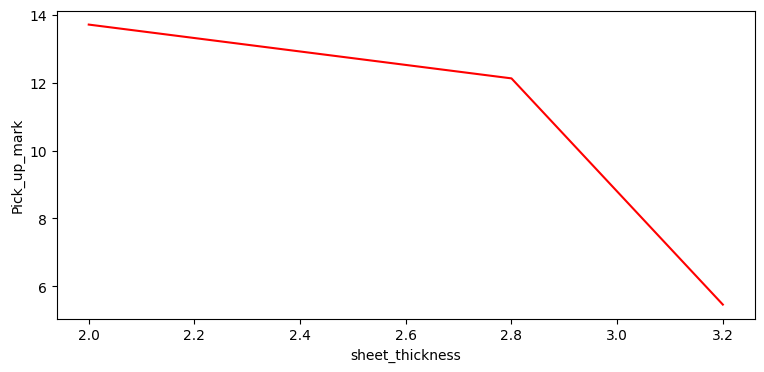

In [331]:
# Understanding relationship between rented bike count and humidity
plt.figure(figsize = (9,4))
temp_df = defects.groupby('sheet_thickness').mean()['Pick_up_mark']
x0 = sns.lineplot(data = temp_df,color ='r')

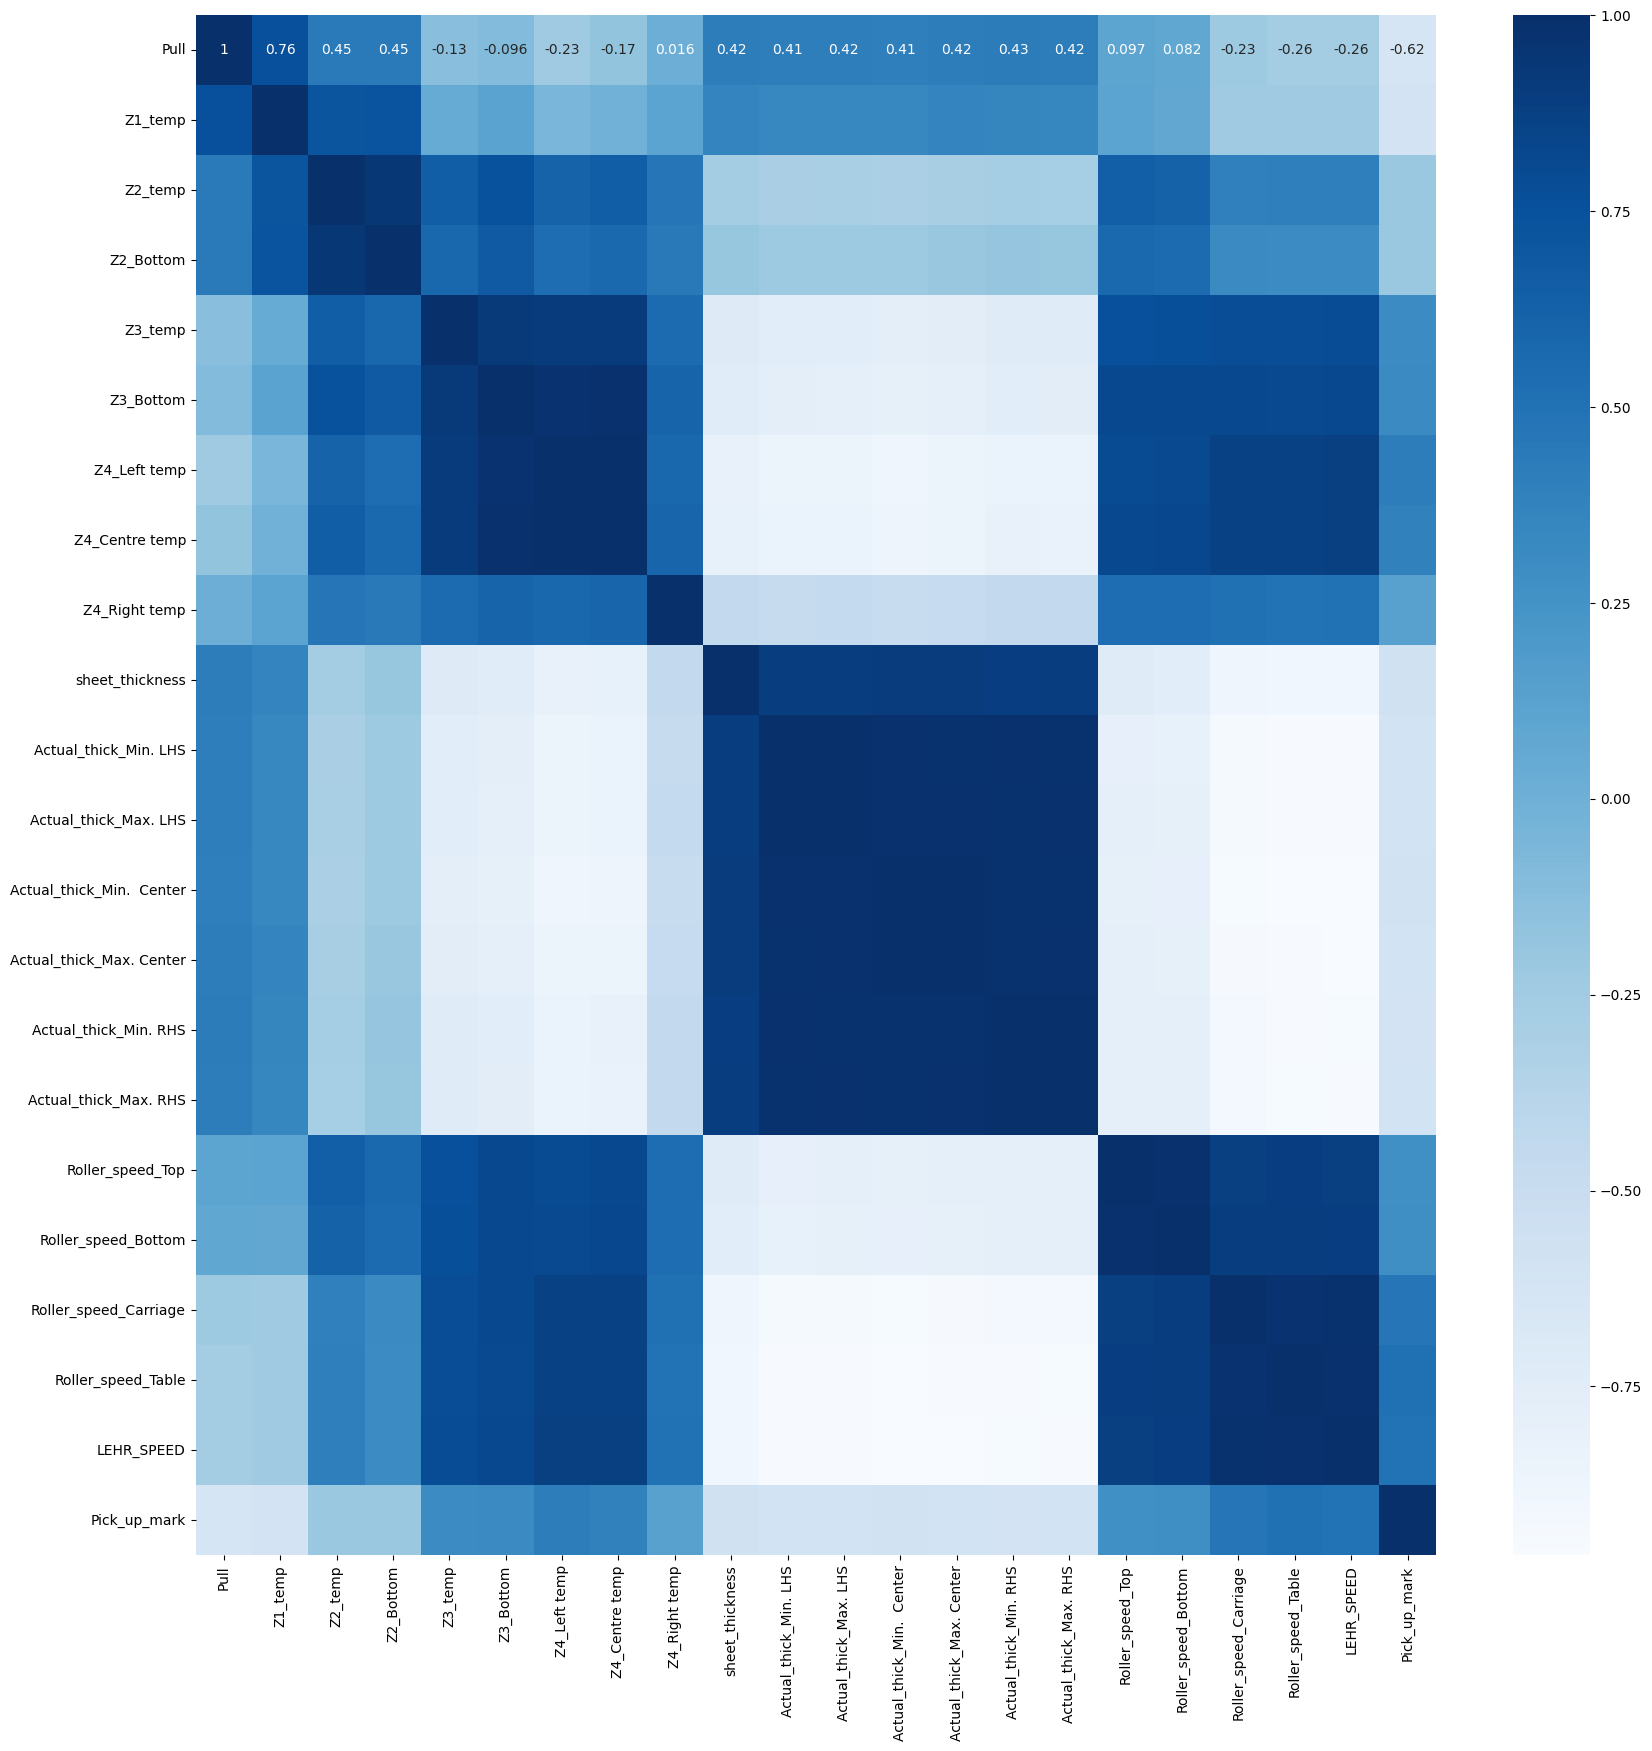

In [332]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize = (20,20))
sns.heatmap(defects.corr(), annot=True ,cmap = 'Blues')
plt.show()

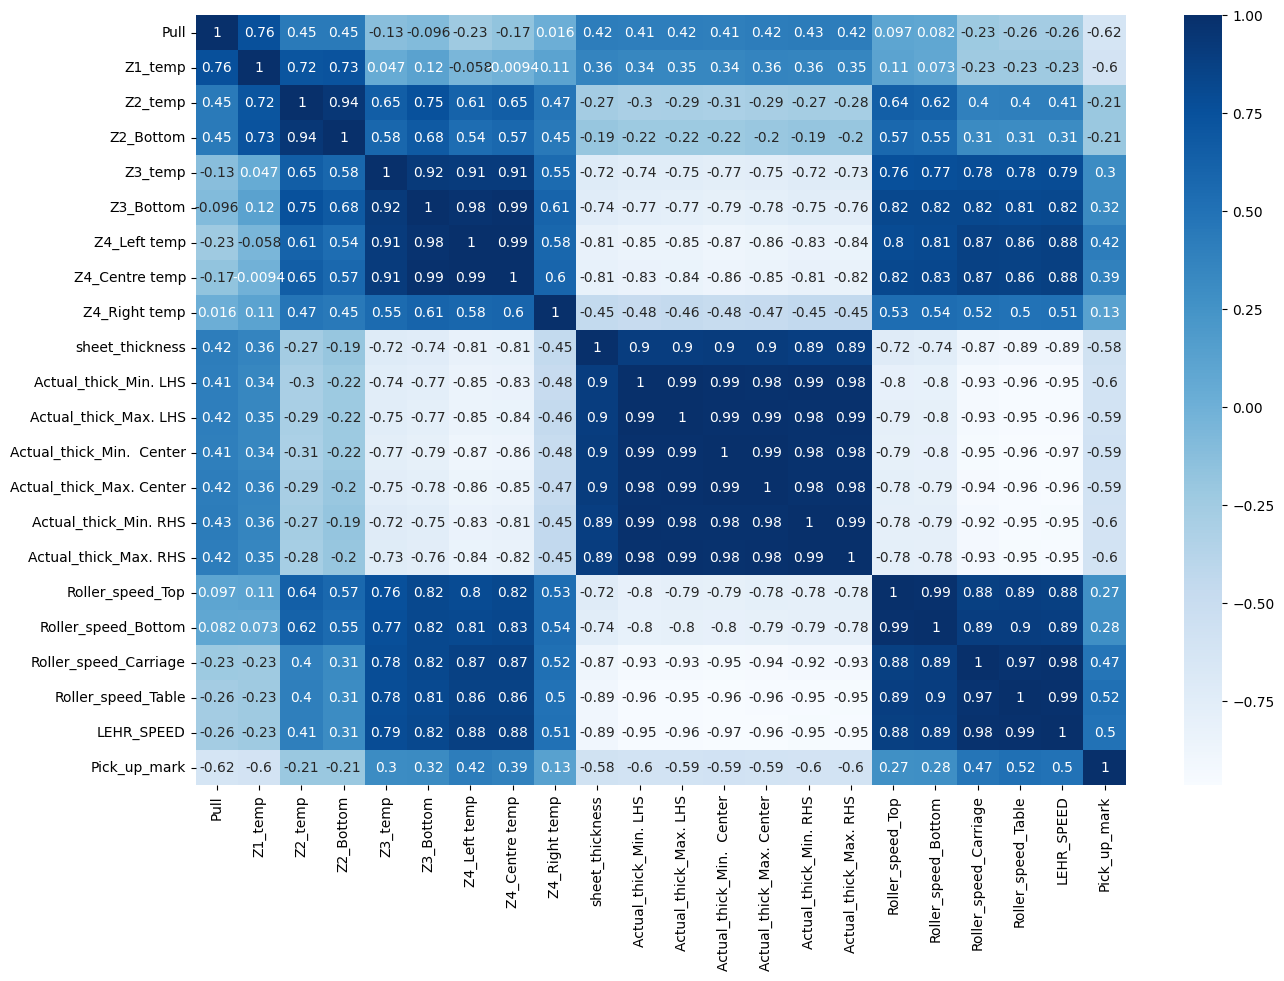

In [333]:
defects.corr()

Pull   Z1_temp   Z2_temp  Z2_Bottom   Z3_temp  \
Pull                       1.000000  0.761134  0.446548   0.445793 -0.128498   
Z1_temp                    0.761134  1.000000  0.721611   0.734120  0.047384   
Z2_temp                    0.446548  0.721611  1.000000   0.939454  0.651628   
Z2_Bottom                  0.445793  0.734120  0.939454   1.000000  0.580896   
Z3_temp                   -0.128498  0.047384  0.651628   0.580896  1.000000   
Z3_Bottom                 -0.095660  0.121973  0.747318   0.679432  0.917280   
Z4_Left temp              -0.233397 -0.057982  0.613003   0.538299  0.909676   
Z4_Centre temp            -0.172037 -0.009367  0.649163   0.573735  0.914693   
Z4_Right temp              0.015771  0.110943  0.474943   0.448575  0.554169   
sheet_thickness            0.417775  0.362985 -0.266593  -0.192218 -0.715184   
Actual_thick_Min. LHS      0.412812  0.343329 -0.298520  -0.224046 -0.744404   
Actual_thick_Max. LHS      0.415963  0.346395 -0.294970  -0.221152 -0.746788   
Actual_thick_Min.  Center  0.405741  0.344320 -0.309768  -0.222770 -0.765827   
Actual_thick_Max. Center   0.423079  0.364817 -0.286248  -0.199671 -0.754583   
Actual_thick_Min. RHS      0.425448  0.360135 -0.271441  -0.186868 -0.723452   
Actual_thick_Max. RHS      0.421634  0.354371 -0.279684  -0.195679 -0.731991   
Roller_speed_Top           0.097001  0.113430  0.642527   0.571501  0.758441   
Roller_speed_Bottom        0.081660  0.072972  0.623483   0.548643  0.765899   
Roller_speed_Carriage     -0.225716 -0.232573  0.400708   0.314780  0.779126   
Roller_speed_Table        -0.264042 -0.230813  0.404116   0.307694  0.777562   
LEHR_SPEED                -0.259741 -0.228973  0.407790   0.306760  0.786459   
Pick_up_mark              -0.620356 -0.603886 -0.207792  -0.208868  0.303055   

                           Z3_Bottom  Z4_Left temp  Z4_Centre temp  \
Pull                       -0.095660     -0.233397       -0.172037   
Z1_temp                     0.121973     -0.057982       -0.009367   
Z2_temp                     0.747318      0.613003        0.649163   
Z2_Bottom                   0.679432      0.538299        0.573735   
Z3_temp                     0.917280      0.909676        0.914693   
Z3_Bottom                   1.000000      0.975303        0.985245   
Z4_Left temp                0.975303      1.000000        0.993057   
Z4_Centre temp              0.985245      0.993057        1.000000   
Z4_Right temp               0.606910      0.577724        0.599576   
sheet_thickness            -0.740096     -0.813728       -0.805272   
Actual_thick_Min. LHS      -0.773539     -0.846653       -0.833911   
Actual_thick_Max. LHS      -0.774222     -0.850113       -0.837211   
Actual_thick_Min.  Center  -0.793105     -0.867335       -0.858405   
Actual_thick_Max. Center   -0.777297     -0.855932       -0.845431   
Actual_thick_Min. RHS      -0.749593     -0.827513       -0.813834   
Actual_thick_Max. RHS      -0.757532     -0.835204       -0.821894   
Roller_speed_Top            0.815954      0.800076        0.821017   
Roller_speed_Bottom         0.821998      0.809433        0.830319   
Roller_speed_Carriage       0.815737      0.871848        0.874260   
Roller_speed_Table          0.812031      0.864441        0.863595   
LEHR_SPEED                  0.821078      0.877847        0.877332   
Pick_up_mark                0.316198      0.422836        0.390785   

                           Z4_Right temp  sheet_thickness  \
Pull                            0.015771         0.417775   
Z1_temp                         0.110943         0.362985   
Z2_temp                         0.474943        -0.266593   
Z2_Bottom                       0.448575        -0.192218   
Z3_temp                         0.554169        -0.715184   
Z3_Bottom                       0.606910        -0.740096   
Z4_Left temp                    0.577724        -0.813728   
Z4_Centre temp                  0.599576        -0.805272   
Z4_Right temp                 

In [334]:
#Checking the variance inflation factor for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] #or X.shape[1]

    return(vif)

In [335]:
calc_vif(defects[[i for i in defects.describe().columns if i not in ['Pick_up_mark']]])

variables           VIF
0                        Pull  3.509490e+03
1                     Z1_temp  4.132617e+05
2                     Z2_temp  6.959820e+05
3                   Z2_Bottom  3.376689e+05
4                     Z3_temp  5.310547e+04
5                   Z3_Bottom  2.099432e+06
6                Z4_Left temp  5.504290e+05
7              Z4_Centre temp  1.703987e+06
8               Z4_Right temp  4.967752e+03
9             sheet_thickness  4.020848e+02
10      Actual_thick_Min. LHS  1.207563e+04
11      Actual_thick_Max. LHS  1.218475e+04
12  Actual_thick_Min.  Center  7.474576e+03
13   Actual_thick_Max. Center  7.417791e+03
14      Actual_thick_Min. RHS  8.511312e+03
15      Actual_thick_Max. RHS  1.034458e+04
16           Roller_speed_Top  1.158918e+04
17        Roller_speed_Bottom  1.302100e+04
18      Roller_speed_Carriage  1.545492e+03
19         Roller_speed_Table  3.773571e+03
20                 LEHR_SPEED  4.623989e+03

<Axes: xlabel='Pick_up_mark', ylabel='Density'>

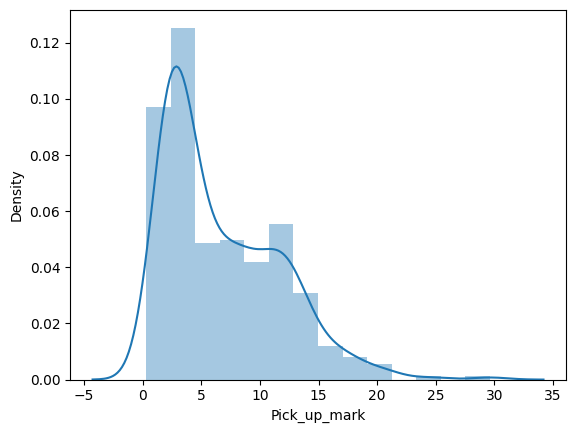

In [336]:
sns.distplot(defects['Pick_up_mark'])

In [337]:
# Separating the dependent and independent features.
X= (defects.drop(columns= ['Pick_up_mark'], axis =1))
y = (defects['Pick_up_mark'])



In [338]:
# Split the data for train and test. Splitting the dataset as training and test data in 80/20 ratio.
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(283, 21)
(71, 21)


In [339]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
import numpy as np
pipe = Pipeline((
("lr", LinearRegression()),
))
for i in range(1,50):
  a = SelectKBest(k=i)
  NewX = a.fit_transform(X,y)
  # Split the data for train and test. Splitting the dataset as training and test data in 80/20 ratio.
  X_trainnew , X_testnew, y_trainnew, y_testnew = train_test_split(NewX, y, test_size = 0.2, random_state = 0)
  pipe.fit(X_trainnew,y_trainnew)
  print(i)
  print("Training")
  print(pipe.score(X_trainnew,y_trainnew))

  print("Testing")
  print(pipe.score(X_testnew,y_testnew))
  print("------------")

1
Training
0.34168903628364666
Testing
0.29749761015794673
------------
2
Training
0.5357982908814412
Testing
0.42191116731038236
------------
3
Training
0.5492926622218648
Testing
0.4826368781430531
------------
4
Training
0.5511789052058385
Testing
0.4735747322675612
------------
5
Training
0.5545645121113264
Testing
0.46616094941077657
------------
6
Training
0.5585811834062665
Testing
0.45693738288877994
------------
7
Training
0.5615248248646318
Testing
0.4583972975662757
------------
8
Training
0.5625237479490757
Testing
0.451436449191003
------------
9
Training
0.5684467981546917
Testing
0.4483293544092153
------------
10
Training
0.5803939585121228
Testing
0.45781180516596987
------------
11
Training
0.5876409173137118
Testing
0.46361246583869453
------------
12
Training
0.5917286420353733
Testing
0.4676136101245967
------------
13
Training
0.5929235997105372
Testing
0.4569696317566133
------------
14
Training
0.613438949733105
Testing
0.4636180103443275
------------
15
Trainin

In [340]:
# Perform Multiple linear regression using scaling
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
# Fit the Algorithm
lr.fit(X_train,y_train)
print("Training")
print(lr.score(X_train,y_train))

print("Testing")
print(lr.score(X_test,y_test))

print(lr.coef_)
print(lr.intercept_)

# Predict on the model
y_pred_test = lr.predict(X_test)

Training
0.6572921204901157
Testing
0.48374828879726417
[ -0.0385008   -0.02744605  -0.67906213   0.09785715  -0.05467121
   0.7229059   -0.07931483  -0.10726389  -0.0140049   -1.7703485
  -6.19925741   9.18125783  -6.99465168   4.49457354   7.13098928
 -11.35390717   0.06679099  -0.0483348   -0.02743895   0.028456
  -0.01789085]
197.6598516378445


In [341]:
#15.13

lr.predict([[204.49,	1332.0,	1253.0,	1270.0	,1210.0,	1240.0,	1164.0,	1157.0	,1160.0,	2.0,	2.1	,2.19	,1.94,	2.05	,2.09,	2.11,	716.0	,716.0,	899.0,	1073.0,	1112.0]])

array([13.54589472])

In [342]:
# Transform Your data using Scaling and Transformation
# using some pre-processors and pipeline to improve results
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

pipe = Pipeline((
("sc",StandardScaler()),
("pt", PowerTransformer()),
("lr", LinearRegression()),
))

pipe.fit(X_train,y_train)

print("Training")
print(pipe.score(X_train,y_train))

print("Testing")
print(pipe.score(X_test,y_test))

y_pred_test = lr.predict(X_test)

Training
0.6722919706312935
Testing
0.4959123851608308


In [343]:
#Using Polynomial Technique to improve the accuracy
from sklearn.preprocessing import PolynomialFeatures
pipe1 = Pipeline((
("sc",StandardScaler()),
("pt", PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))

pipe1.fit(X_train,y_train)

print("Training")
print(pipe1.score(X_train,y_train))

print("Testing")
print(pipe1.score(X_test,y_test))



Training
0.9741308030096206
Testing
-30.93399384660743


In [344]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 13.284181761517937
RMSE : 3.644747146444858
MAE : 2.2723064147079923
R2 : 0.48374828879726417
Adjusted R2 : 0.26249755542466313


In [345]:
# storing the metrics of test set in a Dataframe
test_dict = {'Model':'Linear regression test ',
            'MAE':round((MAE_lr),3),
            'MSE':round((MSE_lr),3),
            'RMSE':round((RMSE_lr),3),
            'R2_score':round((r2_lr),3),
            'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df = pd.DataFrame(test_dict, index = [0])
test_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression test   2.272  13.284  3.645     0.484         0.26

Text(0.5, 0.98, 'Residual Analysis')

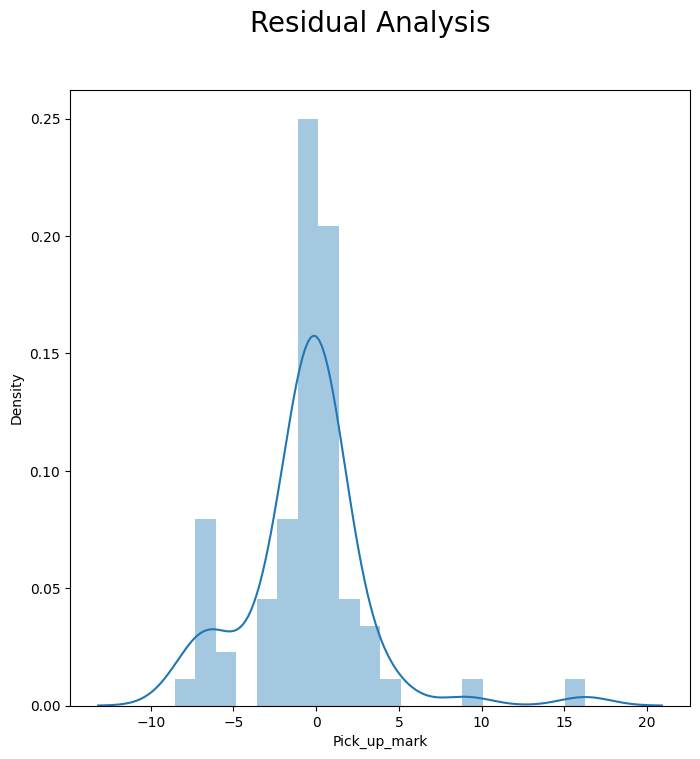

In [346]:
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test) - (y_pred_test),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

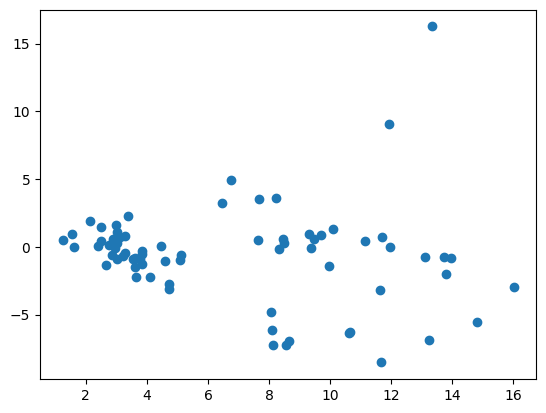

In [347]:
# Heteroscedasticity
plt.scatter((y_pred_test), (y_test)-(y_pred_test))

In [348]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoreslr)


[  0.53057061 -26.93118953   0.52264078   0.67288157   0.56070257
   0.26396849   0.62433485   0.6840002    0.63076684   0.40365609]


In [349]:
import numpy as np
np.mean(scoreslr)

-2.2037667531364264

In [350]:
# Using GridSearch CV for hyperparameter tuning
### Cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5, 10,20,30,40,45,50,55,60,100] }

lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5, verbose= 10)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2 score is: ", lasso_regressor.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START alpha=1e-15................................................
[CV 1/5; 1/20] END .................alpha=1e-15;, score=0.532 total time=   0.0s
[CV 2/5; 1/20] START alpha=1e-15................................................
[CV 2/5; 1/20] END ................alpha=1e-15;, score=-3.409 total time=   0.0s
[CV 3/5; 1/20] START alpha=1e-15................................................
[CV 3/5; 1/20] END .................alpha=1e-15;, score=0.565 total time=   0.0s
[CV 4/5; 1/20] START alpha=1e-15................................................
[CV 4/5; 1/20] END .................alpha=1e-15;, score=0.624 total time=   0.0s
[CV 5/5; 1/20] START alpha=1e-15................................................
[CV 5/5; 1/20] END .................alpha=1e-15;, score=0.432 total time=   0.0s
[CV 1/5; 2/20] START alpha=1e-13................................................
[CV 1/5; 2/20] END .................alpha=1e-13

In [351]:
# Creating an instance of Lasso Regression
# Using alpha = 1 as we got from GridSearch CV

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1,max_iter = 3000 )

lasso.fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

y_pred_test_lasso = lasso.predict(X_test)

0.6022738043575255
0.5121267925315536


In [352]:
#metrics for lasso regressor for test dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#calculate MSE
MSE_la= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_la)

#calculate RMSE
RMSE_la=np.sqrt(MSE_la)
print("RMSE :",RMSE_la)

#calculate MAE
MAE_la= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_la)

#calculate r2 and adjusted r2
r2_la= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_la)
Adjusted_R2_la = (1-(1-r2_la)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_la)

MSE : 12.553946503124438
RMSE : 3.5431548799233203
MAE : 2.4846803141273823
R2 : 0.5121267925315536
Adjusted R2 : 0.3030382750450765


In [353]:
# Storing the metrics of test set in a dataframe
train_dict2 = {'Model': 'Lasso Regression train',
              'MAE': round((MAE_la), 3),
              'MSE':round((MSE_la),3),
              'RMSE':round((RMSE_la),3),
              'R2_score':round((r2_la),3),
              'Adjusted R2':round((Adjusted_R2_la ),2)
              }

train_df = pd.DataFrame(train_dict2, index = [0])
train_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Lasso Regression train  2.485  12.554  3.543     0.512          0.3

Text(0.5, 0.98, 'Residual Analysis')

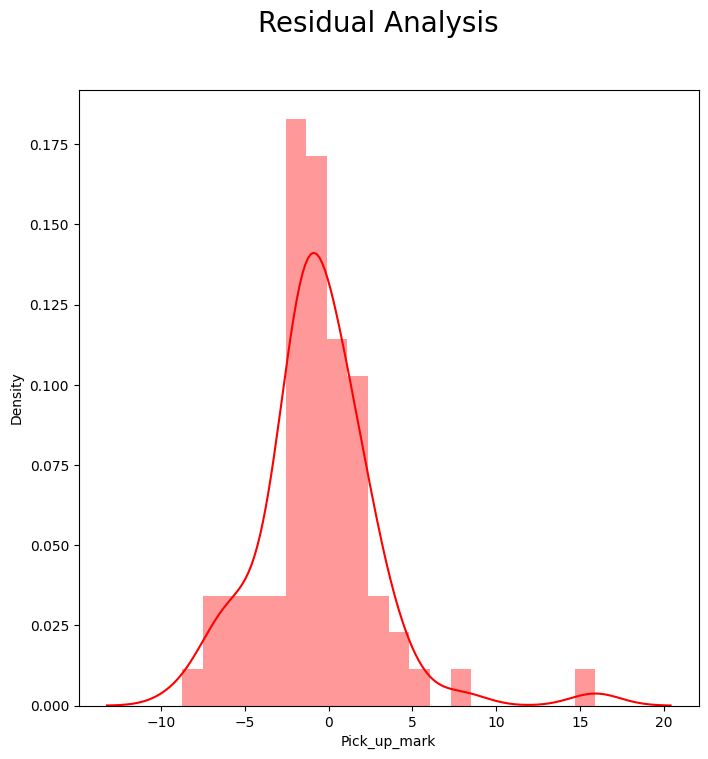

In [354]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_lasso),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

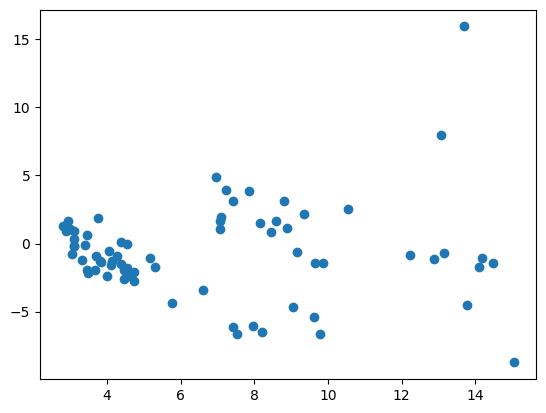

In [355]:
## Heteroscedasticity
plt.scatter((y_pred_test_lasso), (y_test)- (y_pred_test_lasso))

In [356]:
# importing the packages essential for decision tree algorithm ('poisson', 'friedman_mse', 'absolute_error', 'squared_error')
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features=30, max_leaf_nodes=100, random_state=0)

dt.fit(X_train, y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
print('-------------------------')
y_pred_test_d = dt.predict(X_test)

Training Accuracy
0.9932482037461378
Testing Accuracy
0.5595600964366404
-------------------------


In [357]:
# Visualizing evaluation Metric Score chart
# evaluating metrics for test set
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 11.333393395113447
RMSE : 3.366510566612475
MAE : 2.1673503664704334
R2 : 0.5595600964366404
Adjusted R2 : 0.3708001377666291


In [358]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
train_df1 = pd.DataFrame(dict2, index = [0])
train_df1

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Decision tree test   2.167  11.333  3.367      0.56         0.37

In [359]:
# ML Model - 1 Implementation with hyperparameter optimization techniques 
#Using GridSearchCV to find the optimum depth and features
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [i for i in range(50)], 'max_features': [i for i in range(50)] }

dt_re = GridSearchCV(dt, parameters, scoring='r2', cv=5, verbose= 10)
dt_re.fit(X_train, y_train)


Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5; 1/2500] START max_depth=0, max_features=0..............................
[CV 1/5; 1/2500] END .max_depth=0, max_features=0;, score=nan total time=   0.0s
[CV 2/5; 1/2500] START max_depth=0, max_features=0..............................
[CV 2/5; 1/2500] END .max_depth=0, max_features=0;, score=nan total time=   0.0s
[CV 3/5; 1/2500] START max_depth=0, max_features=0..............................
[CV 3/5; 1/2500] END .max_depth=0, max_features=0;, score=nan total time=   0.0s
[CV 4/5; 1/2500] START max_depth=0, max_features=0..............................
[CV 4/5; 1/2500] END .max_depth=0, max_features=0;, score=nan total time=   0.0s
[CV 5/5; 1/2500] START max_depth=0, max_features=0..............................
[CV 5/5; 1/2500] END .max_depth=0, max_features=0;, score=nan total time=   0.0s
[CV 1/5; 2/2500] START max_depth=0, max_features=1..............................
[CV 1/5; 2/2500] END .max_depth=0, max_feat

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             max_depth=10, max_features=30,
                                             max_leaf_nodes=100,
                                             random_state=0),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, ...],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='r2', verbose=10)

In [466]:
# importing the packages essential for decision tree algorithm
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='absolute_error', max_depth=318,
                      max_features=49, max_leaf_nodes=100, random_state=0)

# Fit the Algorithm
dt.fit(X_train, y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
print('-------------------------')
# Predict on the model
y_pred_test_d = dt.predict(X_test)

Training Accuracy
0.9748726864360426
Testing Accuracy
0.6398347216443556
-------------------------


[Text(0.5832637032085561, 0.975, 'x[1] <= 1337.5\nabsolute_error = 3.994\nsamples = 283\nvalue = 5.6'),
 Text(0.2758188502673797, 0.925, 'x[2] <= 1239.5\nabsolute_error = 3.304\nsamples = 144\nvalue = 9.925'),
 Text(0.14054144385026737, 0.875, 'x[2] <= 1233.5\nabsolute_error = 2.453\nsamples = 89\nvalue = 7.97'),
 Text(0.08021390374331551, 0.825, 'x[13] <= 3.245\nabsolute_error = 1.668\nsamples = 32\nvalue = 6.7'),
 Text(0.06951871657754011, 0.775, 'x[0] <= 220.295\nabsolute_error = 1.445\nsamples = 30\nvalue = 6.8'),
 Text(0.058823529411764705, 0.725, 'x[13] <= 3.11\nabsolute_error = 1.335\nsamples = 29\nvalue = 6.85'),
 Text(0.0481283422459893, 0.675, 'absolute_error = 0.15\nsamples = 2\nvalue = 9.09'),
 Text(0.06951871657754011, 0.675, 'x[0] <= 205.95\nabsolute_error = 1.264\nsamples = 27\nvalue = 6.75'),
 Text(0.0427807486631016, 0.625, 'x[6] <= 1115.5\nabsolute_error = 1.2\nsamples = 24\nvalue = 6.65'),
 Text(0.0213903743315508, 0.575, 'x[11] <= 3.235\nabsolute_error = 1.223\nsamp

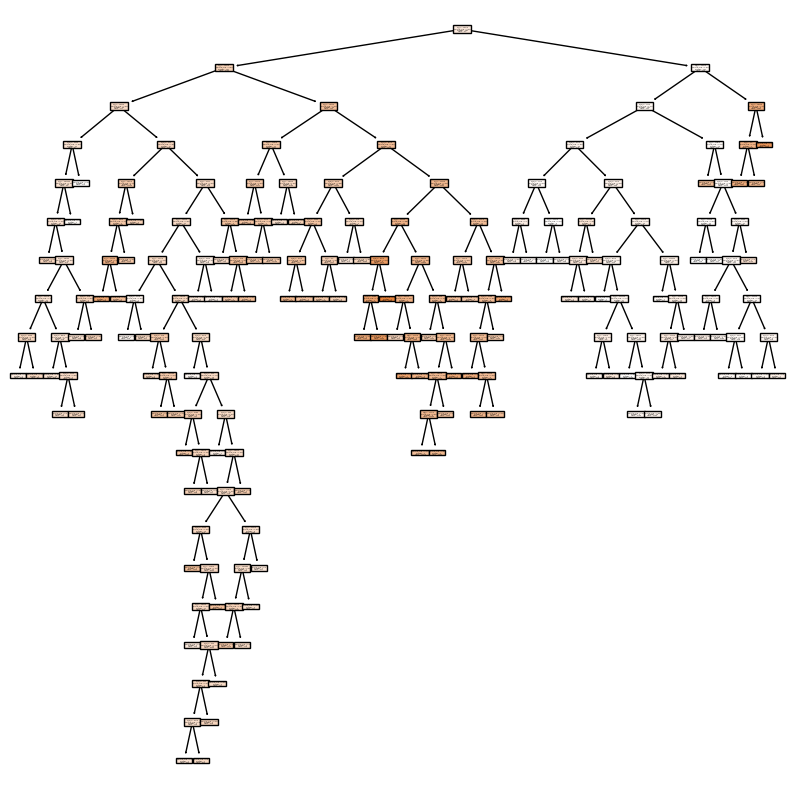

In [467]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt,filled=True)

In [362]:
defects.loc[[32],:]

Pull  Z1_temp  Z2_temp  Z2_Bottom  Z3_temp  Z3_Bottom  Z4_Left temp  \
32  221.79   1346.0   1252.0     1271.0   1190.0     1224.0        1134.0   

    Z4_Centre temp  Z4_Right temp  sheet_thickness  Actual_thick_Min. LHS  \
32          1133.0         1141.0              3.2                   3.13   

    Actual_thick_Max. LHS  Actual_thick_Min.  Center  \
32                   3.17                       3.02   

    Actual_thick_Max. Center  Actual_thick_Min. RHS  Actual_thick_Max. RHS  \
32                      3.21                   3.12                   3.15   

    Roller_speed_Top  Roller_speed_Bottom  Roller_speed_Carriage  \
32             655.0                655.0                  685.0   

    Roller_speed_Table  LEHR_SPEED  Pick_up_mark  
32               728.0       748.0          1.93

In [366]:
#13.46

dt.predict([[217.6,	1331.0	,1234.0,	1257.0,	1176.0,	1211.0,	1119.0,	1120.0,	1127.0	,3.2	,3.19,	3.32,	3.03	,3.18	,3.2	,3.32	,630.0	,630.0	,679.0,	734.0	,751.0]])

array([13.46])

In [367]:
#13.46

dt.predict([[214.97,	1332.0	,1234.0,	1257.0,	1177.0	,1211.0,	1120.0,	1121.0,	1130.0	,3.2,	3.11	,3.2,	3.01,	3.14,	3.12	,3.2,	628.0,	628.0,	676.0,	736.0,	752.0]])

array([11.82])

In [553]:
#12.08

dt.predict([[217.6,	1331.0	,1234.0,	1257.0,	1176.0,	1211.0,	1119.0,	1120.0,	1127.0	,3.2	,3.19,	3.32,	3.03	,3.18	,3.2	,3.32	,630.0	,630.0	,679.0,	734.0	,751.0]])

array([13.46])

In [369]:
#9.07

dt.predict([[201.3,	1332.0	,1235.0,	1259.0	,1179.0,	1213.0	,1123.0,	1122.0,	1130.0,	3.2,	3.15	,3.25,	3.03,	3.15,	3.22,	3.34,	578.0,	578.0,	622.0	,686.0	,701.0]])

array([9.08])

In [493]:
#15.13

dt.predict([[204.49,	1332.0,	1253.0,	1270.0	,1210.0,	1240.0,	1164.0,	1157.0	,1160.0,	2.0,	2.1	,2.19	,1.94,	2.05	,2.09,	2.11,	716.0	,716.0,	899.0,	1073.0,	1112.0]])

array([15.69])

In [371]:
#11.73

dt.predict([[202.37	,1329.0,	1238.0	,1261.0,	1188.0	,1220.0,	1138.0,	1131.0,	1131.0,	3.2,	3.23	,3.27	,3.05,	3.19,	3.24,	3.31	,581.0,	581.0,	623.0	,680.0,	701.0	]])

array([11.73])

In [373]:
#9.14

dt.predict([[204.57	,1328.0,	1234.0	,1256.0,	1178.0,	1212.0,	1121.0,	1120.0	,1127.0,	3.2,	3.16	,3.23,	3.06,	3.15	,3.08,	3.14,	593.0	,593.0,	646.0,	683.0	,730.0]])

array([8.69])

In [374]:
#2.45
,
dt.predict([[200.09,	1346.0	,1251.0	,1271.0,	1192.0	,1226.0,	1136.0	,1134.0,	1146.0,	3.2	,3.36,	3.39,	3.07	,3.22,	3.29,	3.32	,557.0,	557.0,	616.0	,654.0	,685.0]])

array([2.45])

In [376]:
#3.47

dt.predict([[209.63,	1346.0	,1252.0,	1272.0,	1195.0,	1229.0,	1141.0,	1140.0	,1150.0,	3.2	,3.19,	3.22	,3.02	,3.21	,3.31,	3.35	,591.0,	591.0,	628.0,	689.0	,718.0]])

array([2.83])

In [377]:
#1.93

dt.predict([[221.79	,1346.0,	1252.0,	1271.0,1190.0,	1224.0	,1134.0	,1133.0,	1141.0,	3.2,	3.13,	3.17,	3.02	,3.21	,3.12,	3.15,	655.0	,655.0,	685.0,	728.0,	748.0]])

array([1.97])

In [378]:
#4.5
dt.predict([[205.45,	1329.0	,1234.0,	1257.0,	1177.0,	1211.0,	1121.0	,1120.0,	1127.0	,3.2	,3.3,	3.32,	3.02,	3.16	,3.0	,3.2,	595.0,	595.0	,640.0,	687.0,	748.0	]])

array([4.5])

In [379]:
#1.7
dt.predict([[216.34,	1346.0,	1250.0	,1271.0,	1189.0,	1223.0,	1135.0	,1132.0,	1142.0,	3.2,	3.26,	3.34	,3.03,	3.15	,3.26	,3.3,	628.0,	628.0,	657.0,	634.0,	758.0]])


array([1.7])

In [380]:
#10
dt.predict([[198.87,	1331.0,	1240.0,	1264.0	,1190.0,	1223.0	,1134.0,	1133.0	,1141.0,	2.8,	2.86,	2.91,	2.78,	2.86,	2.88,	2.93	,604.0,	604.0	,675.0,	748.0	,782.0]])

array([8.835])

In [381]:
#11
dt.predict([[204.6	,1331.0	,1236.0,1257.0,	1179.0,	1213.0,	1128.0,	1123.0	,1127.0,	3.2	,3.15,	3.24,	3.05,	3.11,	3.07,	3.14,	576.0,	576.0,	620.0,	684.0,	699.0]])

array([11.42])

In [555]:
#29
dt.predict([[197.97	,1330.0	,1254.0,	1273.0,	1219.0,	1247.0	,1173.0,	1164.0,	1165.0,	2.0	,2.13,	2.17	,1.99,	2.03,	2.12,	2.18	,709.0,	709.0,	925.0	,1018.0	,1076.0]])

array([24.56])

In [384]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = pd.DataFrame(data=dict2, index = [0])
test_df.drop_duplicates()

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Decision tree test   2.167  11.333  3.367      0.56         0.37

Text(0.5, 0.98, 'Residual Analysis')

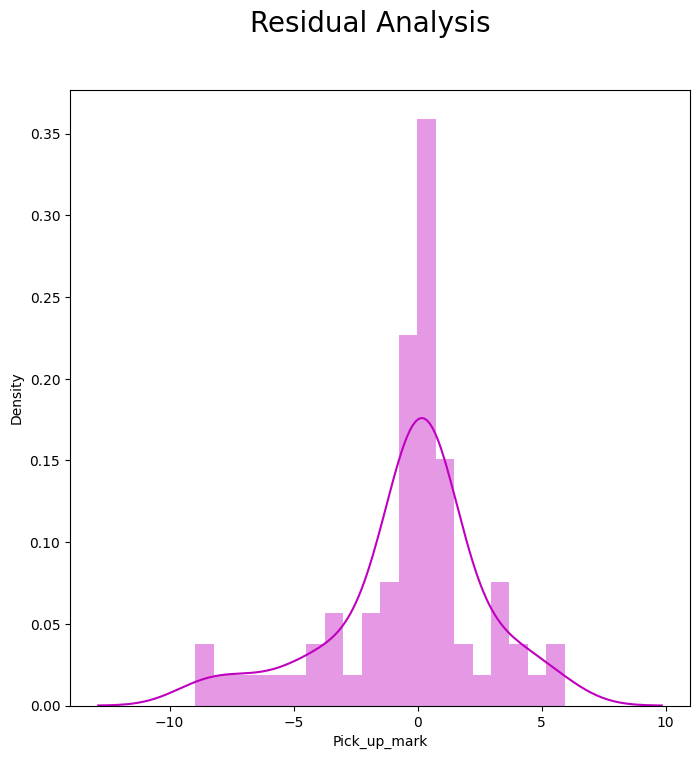

In [385]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_d),bins=20,color='m')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

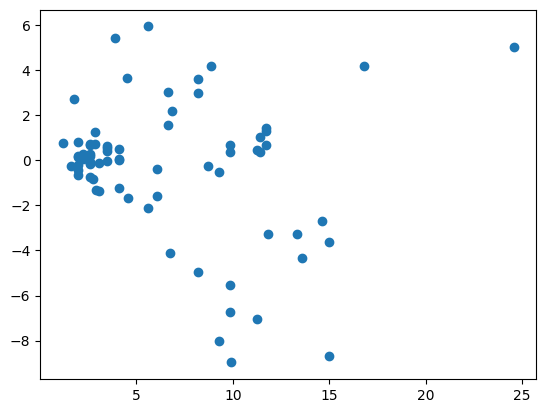

In [386]:
# Heteroscedasticity check
plt.scatter((y_pred_test_d), (y_test)-(y_pred_test_d))

In [387]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import graphviz

In [388]:
dt.feature_importances_

array([0.04759571, 0.47144689, 0.14313111, 0.02102199, 0.03298542,
       0.03568961, 0.0165596 , 0.01997089, 0.00976567, 0.00351641,
       0.00915412, 0.01435229, 0.00114665, 0.03241494, 0.01923512,
       0.01292853, 0.        , 0.01406563, 0.02234065, 0.05250721,
       0.02017156])

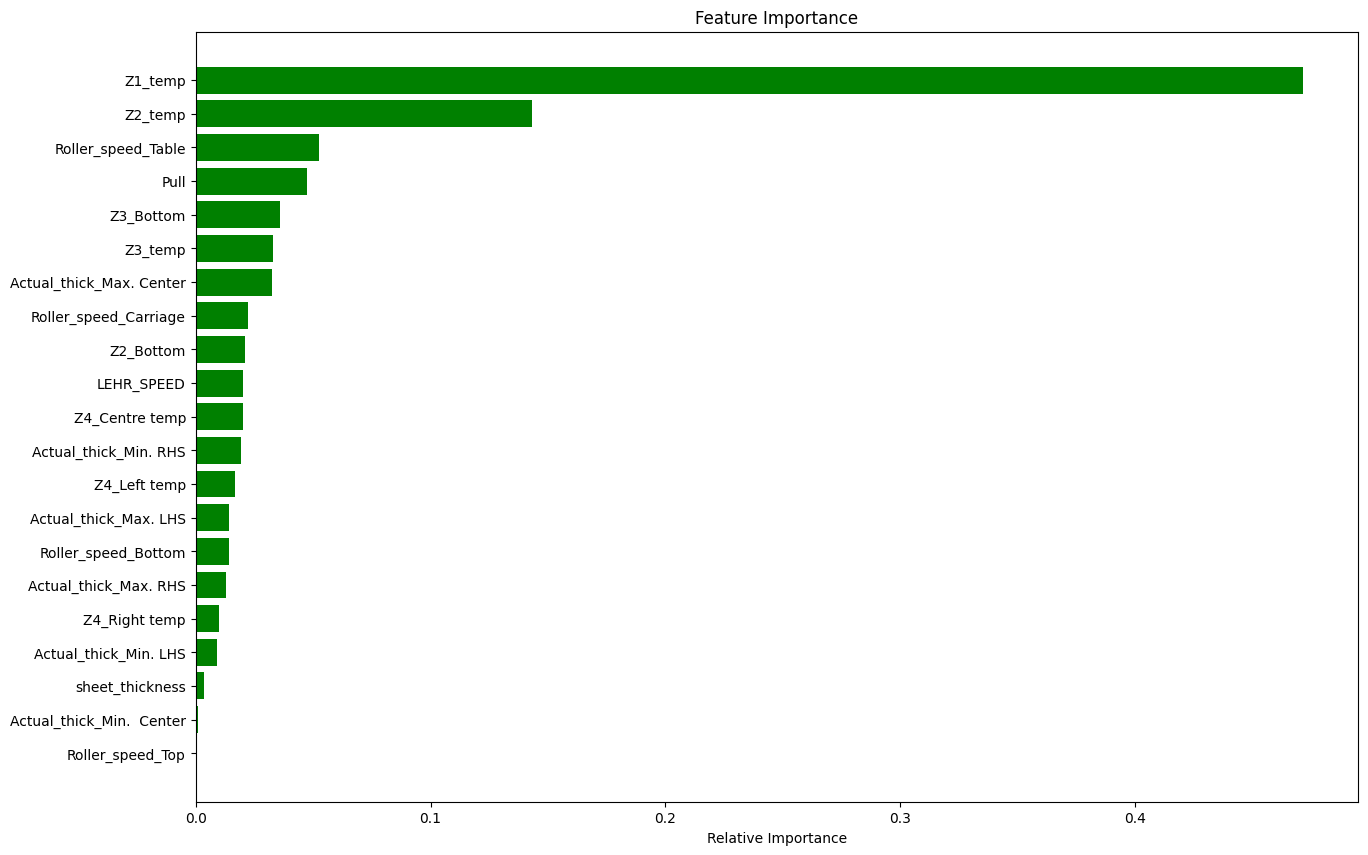

In [389]:
#def get_features_importance (optimal_model,X_train):
features = X.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [390]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor()
# Fit the Algorithm
rf.fit(X_train,y_train)

print("Training Accuracy")
print(rf.score(X_train,y_train))
print("Testing Accuracy")
print(rf.score(X_test,y_test))

# Predict on the model
y_pred_test_r = rf.predict(X_test)





Training Accuracy
0.9623811933222488
Testing Accuracy
0.6471271258024274


In [391]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'max_depth': [i for i in range(10,30,4)], 'max_features': [i for i in range(30,50,4)] }

rf_re = GridSearchCV(rf, parameters, scoring='r2', cv=5, verbose= 10)
rf_re.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=10, max_features=30..............................
[CV 1/5; 1/25] END max_depth=10, max_features=30;, score=0.791 total time=   0.9s
[CV 2/5; 1/25] START max_depth=10, max_features=30..............................
[CV 2/5; 1/25] END max_depth=10, max_features=30;, score=0.678 total time=   0.5s
[CV 3/5; 1/25] START max_depth=10, max_features=30..............................
[CV 3/5; 1/25] END max_depth=10, max_features=30;, score=0.739 total time=   0.5s
[CV 4/5; 1/25] START max_depth=10, max_features=30..............................
[CV 4/5; 1/25] END max_depth=10, max_features=30;, score=0.784 total time=   0.5s
[CV 5/5; 1/25] START max_depth=10, max_features=30..............................
[CV 5/5; 1/25] END max_depth=10, max_features=30;, score=0.649 total time=   0.5s
[CV 1/5; 2/25] START max_depth=10, max_features=34..............................
[CV 1/5; 2/25] END max_depth=10, max_featu

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 14, 18, 22, 26],
                         'max_features': [30, 34, 38, 42, 46]},
             scoring='r2', verbose=10)

In [392]:
rf_re.best_params_


{'max_depth': 26, 'max_features': 38}

In [393]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor(max_depth=26,max_features=34)
# Fitting the model
rf.fit(X_train,y_train)

print("Training Accuracy")
print(rf.score(X_train,y_train))
print("Testing Accuracy")
print(rf.score(X_test,y_test))

y_pred_test_r = rf.predict(X_test)



Training Accuracy
0.9664288023902459
Testing Accuracy
0.6575918648888323


In [394]:
rf.predict([[205.45	,1329.0	,1234.0,	1257.0	,1177.0,	1211.0,	1121.0,	1120.0	,1127.0,	3.2,	3.3	,3.32,	3.02,	3.16	,3.0	,3.2,	595.0,	595.0,	640.0	,687.0,	748.0]])

array([6.3812])

In [518]:
rf.predict([[196.8	,1331.0	,1255.0,	1274.0	,1219.0,	1248.0,	1177.0,	1168.0,	1169.0	,2.0,	2.13	,2.19	,1.91,	2.01	,2.14	,2.19	,712.0	,712.0,	989.0	,1030.0	,1094.0	]])

array([12.9561])

In [519]:
#10
rf.predict([[198.87,	1331.0,	1240.0,	1264.0	,1190.0,	1223.0	,1134.0,	1133.0	,1141.0,	2.8,	2.86,	2.91,	2.78,	2.86,	2.88,	2.93	,604.0,	604.0	,675.0,	748.0	,782.0]])

array([9.4812])

In [397]:
#14
rf.predict([[204.14,	1325.0,	1250.0,	1270.0,	1225.0	,1249.0,	1181.0,	1173.0,	1177.0	,2.0,	2.13,	2.17	,1.88,	1.95,	2.12,	2.15,	730.0	,730.0,	1000.0,	1048.0,	1131.0	]])

array([10.7535])

In [535]:
#2.31
rf.predict([[219.62	,1346.0,	1252.0,	1272.0	,1191.0,	1224.0,	1134.0,	1133.0,	1142.0	,3.2,	3.11	,3.24,	3.05,	3.26	,3.21,	3.29,	659.0,	659.0	,685.0	,728.0	,748.0]])


array([2.1508])

In [548]:
#1.4
rf.predict([[219.65,	1346.0,	1261.0,	1277.0	,1190.0,	1224.0,	1134.0	,1132.0	,1141.0,	3.2,	3.26,	3.34	,3.03,	3.15,	3.26	,3.3,	653.0,	653.0,	679.0,	721.0	,740.0]])


array([1.5496])

In [400]:
#1.36
rf.predict([[218.83,	1346.0,	1252.0,	1278.0,	1191.0,	1225.0	,1134.0	,1133.0	,1142.0,	3.2	,3.16,	3.28,	3.04	,3.21	,3.15	,3.33,	653.0,	653.0,	679.0,	721.0,	740.0]])


array([1.6535])

In [401]:
#11
rf.predict([[204.6	,1331.0	,1236.0,1257.0,	1179.0,	1213.0,	1128.0,	1123.0	,1127.0,	3.2	,3.15,	3.24,	3.05,	3.11,	3.07,	3.14,	576.0,	576.0,	620.0,	684.0,	699.0]])

array([10.2192])

In [402]:
#4.27
rf.predict([[221.61,	1346.0,	1251.0,	1271.0,	1191.0,	1225.0,	1138.0,	1137.0,	1147.0,	3.2,	3.2	,3.26,	3.02,	3.19,	3.27,	3.32	,634.0,	634.0	,668.0,	711.0,	763.0]])

array([4.1112])

In [550]:
#14
rf.predict([[204.14,	1325.0,	1250.0,	1270.0,	1225.0	,1249.0,	1181.0,	1173.0,	1177.0	,2.0,	2.13,	2.17	,1.88,	1.95,	2.12,	2.15,	730.0	,730.0,	1000.0,	1048.0,	1131.0	]])

array([10.7535])

In [551]:
#1.7
rf.predict([[216.34,	1346.0,	1250.0	,1271.0,	1189.0,	1223.0,	1135.0	,1132.0,	1142.0,	3.2,	3.26,	3.34	,3.03,	3.15	,3.26	,3.3,	628.0,	628.0,	657.0,	634.0,	758.0]])


array([2.4486])

In [406]:
#4.5
rf.predict([[205.45,	1329.0	,1234.0,	1257.0,	1177.0,	1211.0,	1121.0	,1120.0,	1127.0	,3.2	,3.3,	3.32,	3.02,	3.16	,3.0	,3.2,	595.0,	595.0	,640.0,	687.0,	748.0	]])

array([6.3812])

In [407]:
defects.loc[[205],:]

Pull  Z1_temp  Z2_temp  Z2_Bottom  Z3_temp  Z3_Bottom  Z4_Left temp  \
205  205.45   1329.0   1234.0     1257.0   1177.0     1211.0        1121.0   

     Z4_Centre temp  Z4_Right temp  sheet_thickness  Actual_thick_Min. LHS  \
205          1120.0         1127.0              3.2                    3.3   

     Actual_thick_Max. LHS  Actual_thick_Min.  Center  \
205                   3.32                       3.02   

     Actual_thick_Max. Center  Actual_thick_Min. RHS  Actual_thick_Max. RHS  \
205                      3.16                    3.0                    3.2   

     Roller_speed_Top  Roller_speed_Bottom  Roller_speed_Carriage  \
205             595.0                595.0                  640.0   

     Roller_speed_Table  LEHR_SPEED  Pick_up_mark  
205               687.0       748.0           4.5

In [408]:
# evaluating the metrics for test data

from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


MSE : 8.810841310030778
RMSE : 2.968306134823492
MAE : 1.9103009256673187
R2 : 0.6575918648888323
Adjusted R2 : 0.5108455212697603


In [409]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = pd.DataFrame(data=dict2, index = [0])
test_df.drop_duplicates()

Model   MAE    MSE   RMSE  R2_score  Adjusted R2
0  Random forest regression   1.91  8.811  2.968     0.658        0.511

Text(0.5, 0.98, 'Residual Analysis')

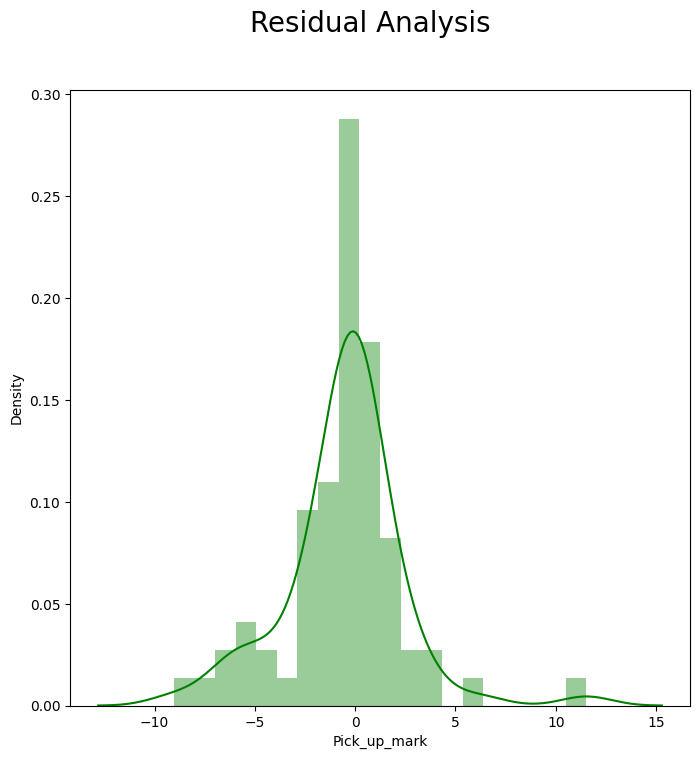

In [410]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_r),bins=20,color='g')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

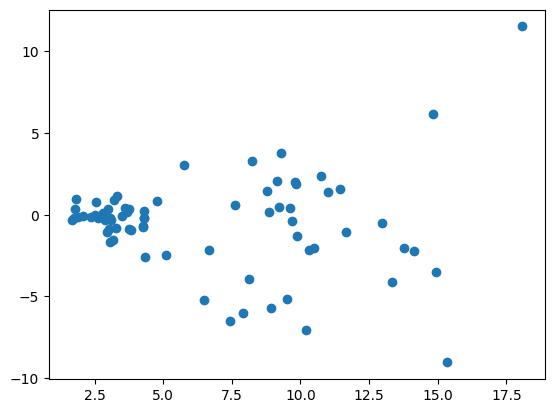

In [411]:
# Heteroscedasticity check
plt.scatter((y_pred_test_r), (y_test)-(y_pred_test_r))

In [412]:
rf.feature_importances_

array([0.13254325, 0.41730226, 0.03597507, 0.03404099, 0.01858868,
       0.02396169, 0.02305324, 0.07022571, 0.01608965, 0.00080045,
       0.02040824, 0.01390811, 0.06493022, 0.02781997, 0.01336658,
       0.01788054, 0.01251788, 0.01057011, 0.00791595, 0.02741549,
       0.01068593])

In [413]:
importances = rf.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [414]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [415]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1                     Z1_temp                0.42
0                        Pull                0.13
7              Z4_Centre temp                0.07
12  Actual_thick_Min.  Center                0.06
2                     Z2_temp                0.04
3                   Z2_Bottom                0.03
19         Roller_speed_Table                0.03
13   Actual_thick_Max. Center                0.03
15      Actual_thick_Max. RHS                0.02
10      Actual_thick_Min. LHS                0.02
8               Z4_Right temp                0.02
6                Z4_Left temp                0.02
5                   Z3_Bottom                0.02
4                     Z3_temp                0.02
11      Actual_thick_Max. LHS                0.01
14      Actual_thick_Min. RHS                0.01
16           Roller_speed_Top                0.01
17        Roller_speed_Bottom                0.01
18      Roller_speed_Carriage                0.01
20                 LEHR_SPEED                0.01
9             sheet_thickness                0.00

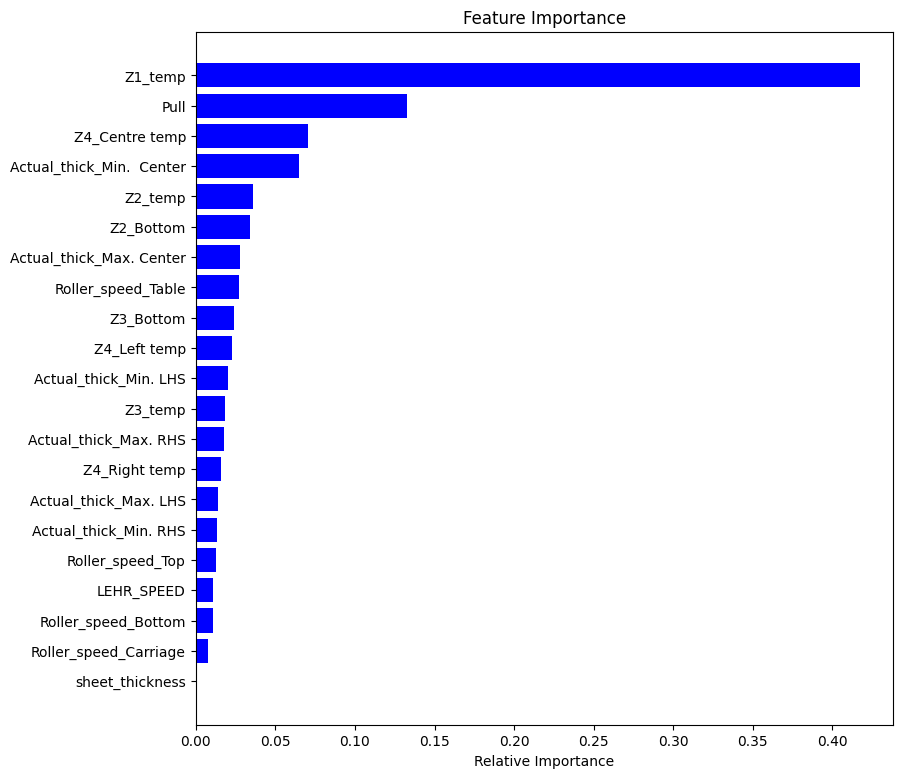

In [416]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

#Plot the figure
plt.figure(figsize=(9,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [417]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = pd.DataFrame(data=dict2, index = [0])
test_df.drop_duplicates()

Model   MAE    MSE   RMSE  R2_score  Adjusted R2
0  Random forest regression   1.91  8.811  2.968     0.658        0.511